# **FML HACKATHON :**

## **OVERVIEW OF THE DATASET :**

### **Importing the Libraries :**

In [ ]:
# importing the libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")

from google.colab import files

random_state = 100

In [ ]:
# to display entire rows and columns of dataframe 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### **Reading the Data :**

In [ ]:
'''
Insert Correct Path as per location of train_input.csv and test_input.csv 
'''
path = "/content/"

# read the train data
train_df = pd.read_csv(path + "train_input.csv")
# read the test data 
test_df = pd.read_csv(path + "test_input.csv")

In [ ]:
# storing the original data 
train_org=train_df.copy()
test_org=test_df.copy()

In [ ]:
# sample of train data
train_df.head(10)

Feature 1 (Discrete)  ...  Target Variable (Discrete)
0                  1404  ...                           1
1                   909  ...                           1
2                   654  ...                           1
3                  1372  ...                           0
4                   786  ...                           2
5                   811  ...                           0
6                   805  ...                           2
7                  1129  ...                           2
8                  1091  ...                           0
9                  1118  ...                           1

[10 rows x 25 columns]

In [ ]:
# shape of datasets 
print("\nTrain dataset shape : ",train_df.shape)
print("\nTest dataset shape : ",test_df.shape)


Train dataset shape :  (994, 25)

Test dataset shape :  (426, 24)


In [ ]:
# info about the dataset 
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Feature 1 (Discrete)        994 non-null    int64  
 1   Feature 2 (Discrete)        994 non-null    int64  
 2   Feature 3 (Discrete)        994 non-null    int64  
 3   Feature 4 (Discrete)        994 non-null    int64  
 4   Feature 5 (Discrete)        994 non-null    int64  
 5   Feature 6 (Discrete)        994 non-null    int64  
 6   Feature 7 (Discrete)        994 non-null    int64  
 7   Feature 8 (Discrete)        994 non-null    int64  
 8   Feature 9                   980 non-null    float64
 9   Feature 10                  993 non-null    float64
 10  Feature 11                  993 non-null    float64
 11  Feature 12                  993 non-null    float64
 12  Feature 13                  993 non-null    float64
 13  Feature 14                  993 non

**NOTE :** 

1. Here there were 24 input features among which 13 features were of datatype int and remaining 11 were of type float. Target variable is a Discrete feature.

2. Feature (9-18) and feature 24 has missing values and it is needed to be taken care of.

In [ ]:
# statistics about the dataset
train_df.describe(percentiles=[0.01,0.1,0.9,0.95,0.99])

Feature 1 (Discrete)  ...  Target Variable (Discrete)
count            994.000000  ...                  994.000000
mean             708.187123  ...                    1.706237
std              405.826060  ...                    2.417255
min                0.000000  ...                    0.000000
1%                12.930000  ...                    0.000000
10%              149.300000  ...                    0.000000
50%              705.000000  ...                    1.000000
90%             1273.700000  ...                    6.000000
95%             1341.700000  ...                    6.000000
99%             1401.140000  ...                   14.000000
max             1412.000000  ...                   17.000000

[11 rows x 25 columns]

1     488
0     249
2     109
6      70
5      41
8       7
7       5
14      5
15      4
13      3
4       3
3       3
9       2
11      1
10      1
16      1
12      1
17      1
Name: Target Variable (Discrete), dtype: int64


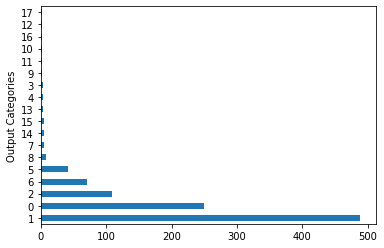

In [ ]:
# target variable 
print(train_df['Target Variable (Discrete)'].value_counts())
train_df['Target Variable (Discrete)'].value_counts().plot(kind='barh',ylabel="Output Categories")

**Note :**

1. Class 1,0,2,6,5 have some good number of occurences.

2. Remaining classes 3,4,7,8,9,10,11,12,13,14,15,16,17 have very few occurences.

## **DATA VISUALIZATION :**

 ### **Correlation Plot -- HEATMAP:** 

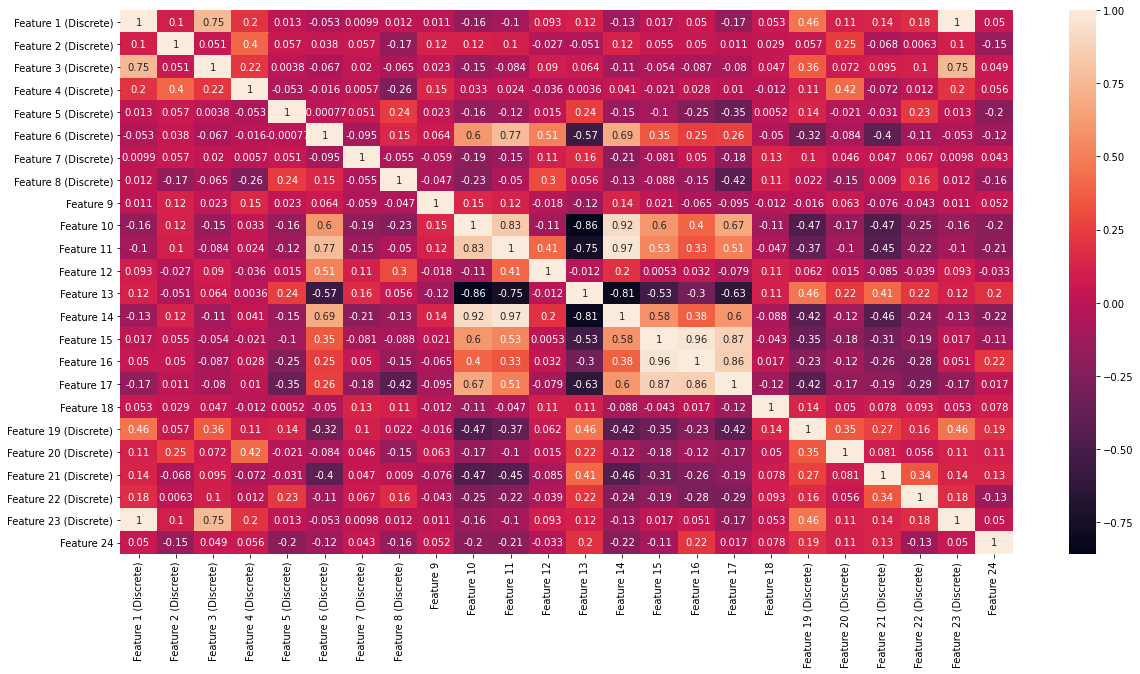

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.drop(columns='Target Variable (Discrete)',axis=1).corr(),annot=True)


**Note :** 

1. Here the correlation between feature 1 and feature 23 is 1. So having both the feature is not so useful for further analysis and anyone could be removed.

2. Similarly Correlation between features(11,14) and feature(15,16) also very high and so anyone could be removed from both sets as having both will lead to redundant feature.

In [ ]:
# get the columns from train dataset 
cols_train=train_df.columns.tolist()
# removing the target varibale 
cols_train.remove('Target Variable (Discrete)')
# getting the discrete columns 
discrete_cols=[x for x in cols_train if "Discrete" in x]
# getting the continuous columns 
continuous_cols=[x for x in cols_train if "Discrete" not in x]

print("\nNumber of columns : ",len(cols_train))
print("\nNumber of Discrete Columns : ",len(discrete_cols))
print("\nNumber of Continuous Columns : ",len(continuous_cols))


Number of columns :  24

Number of Discrete Columns :  13

Number of Continuous Columns :  11


In [ ]:
def discrete_function(cols):
  """
  Input : cols - features of given input data
  returns : 1 if it is categorical feature 
            0 if it is not a categorical feature 
  """
  l=len(train_df[cols].value_counts())
  if l<=20:
    return 1
  else:
    return 0

In [ ]:
discrete_cat=[]
discrete_cont=[]
for x in discrete_cols:
  d=discrete_function(x)
  if d==1:
    discrete_cat.append(x)
  else:
    discrete_cont.append(x)

**Note :**

1. The discrete features (5,6,7,8,21) were the categorical features.

2. Other discrete features(1,2,3,4,19,20,22,23) were not like categorical features.

### **Univariate and Bivariate Analysis:**


In [ ]:
def count_plot(discrete_cat):
  """
  input : discrete_cat : list containing the discrete column 
  plots : count plots of all the features given in the discrete_cat list 
  """
  fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(25,12)) # figure of 2 rows and 3 columns subplots 
  # count plots 
  s2=sns.countplot(x=discrete_cat[0],data=train_df,ax=ax1,palette='magma')
  s3=sns.countplot(x=discrete_cat[1],data=train_df,ax=ax2,palette='crest')
  s4=sns.countplot(x=discrete_cat[2],data=train_df,ax=ax3,palette='cubehelix')
  s5=sns.countplot(x=discrete_cat[3],data=train_df,ax=ax4,palette='Spectral')
  # annotating the labels 
  for p in s2.patches:
    s2.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s3.patches:
    s3.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
  for p in s4.patches:
    s4.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  for p in s5.patches:
    s5.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=45, textcoords = 'offset points',fontsize=12)
  

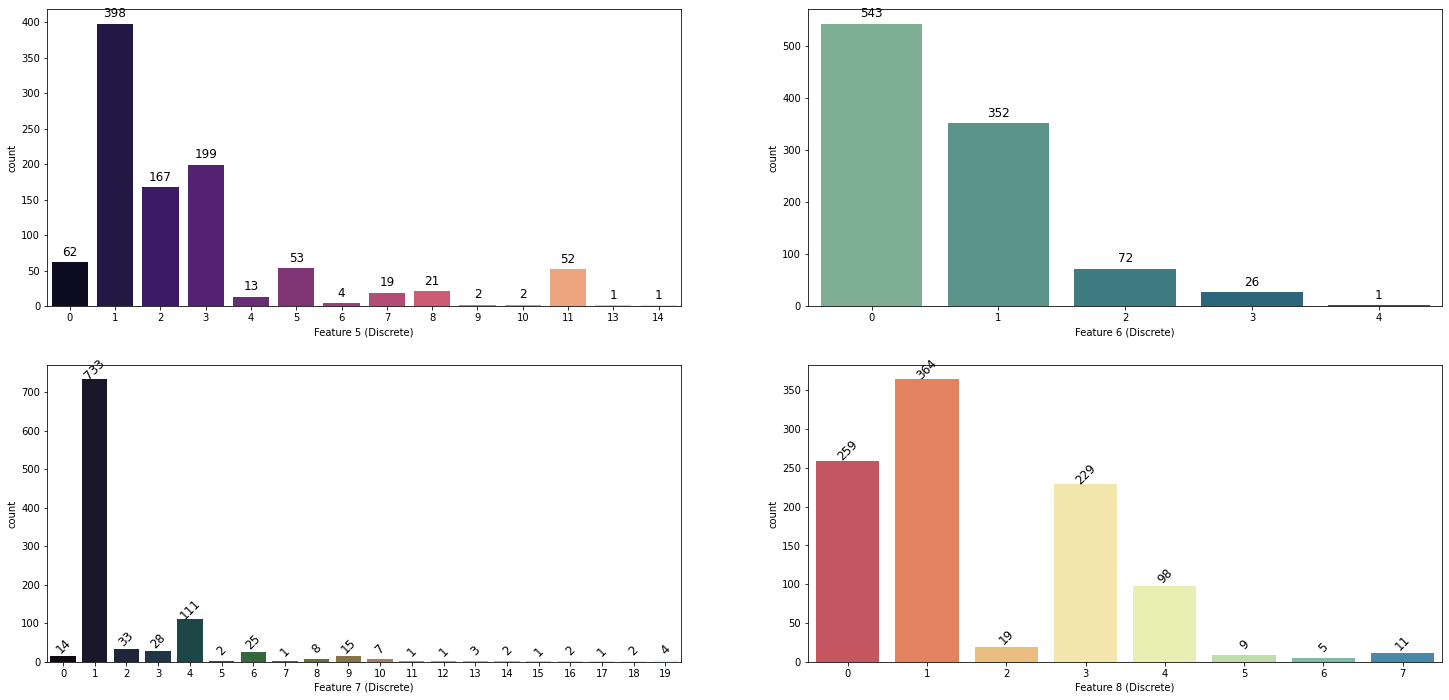

In [ ]:
count_plot(discrete_cat)

**Note :**

In most of categorical features some category entries were very less (in single digit count).


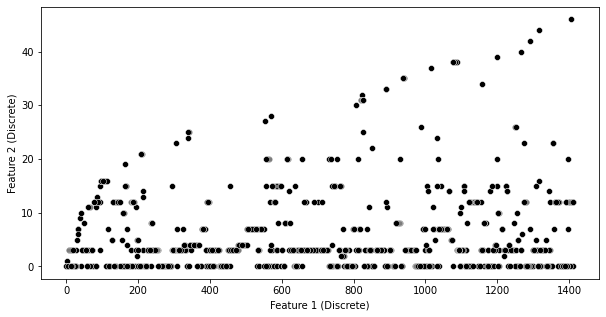

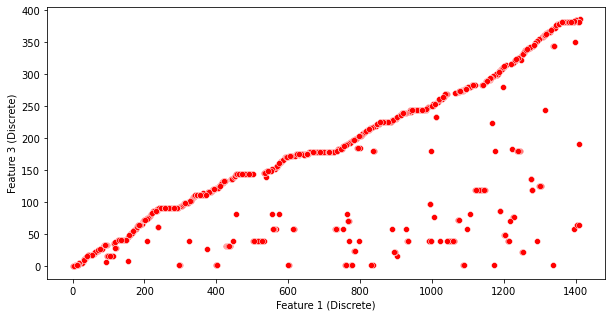

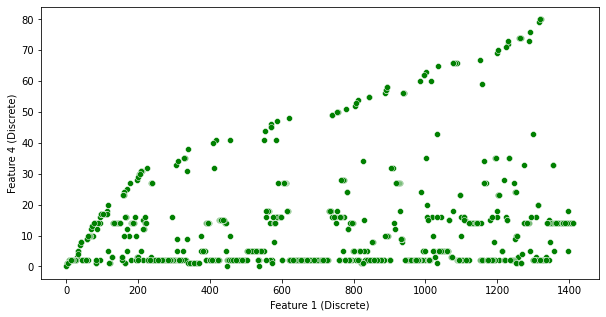

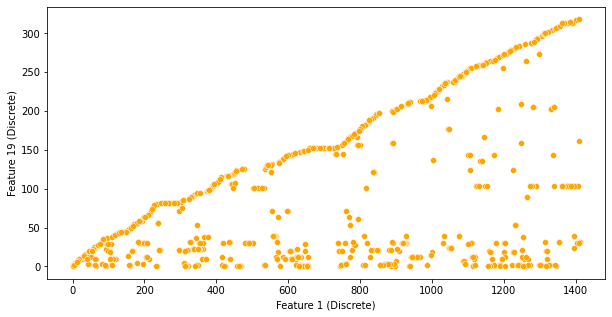

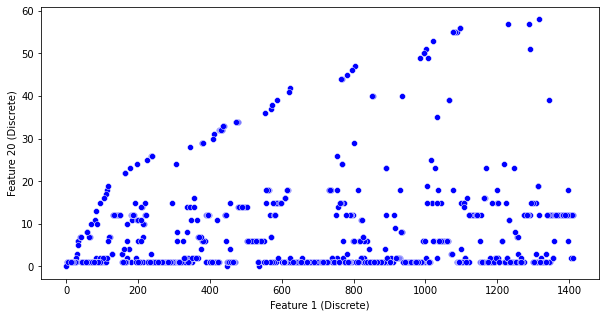

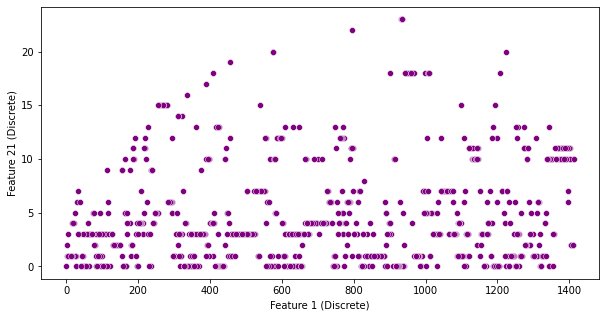

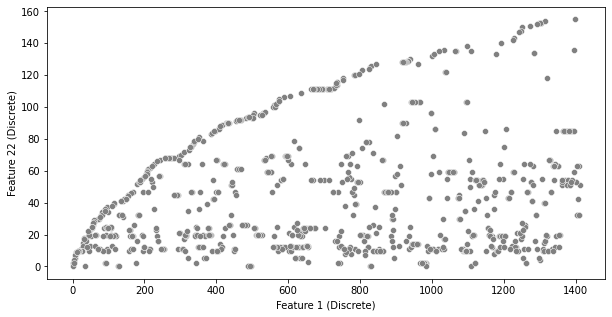

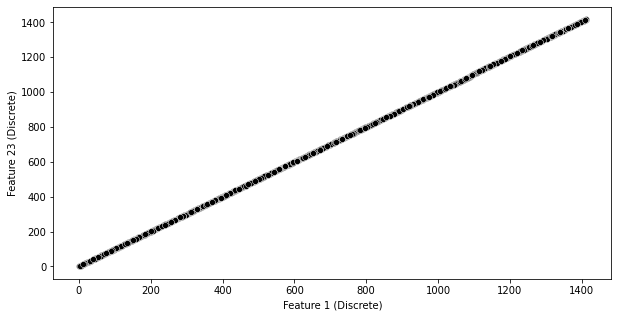

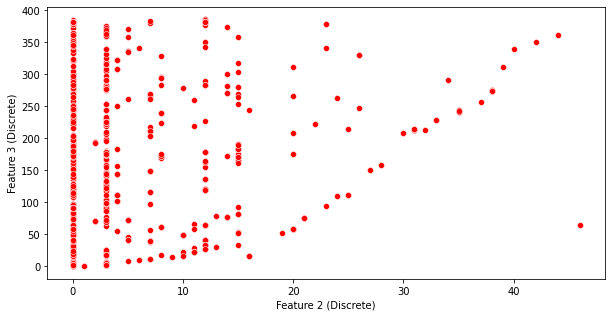

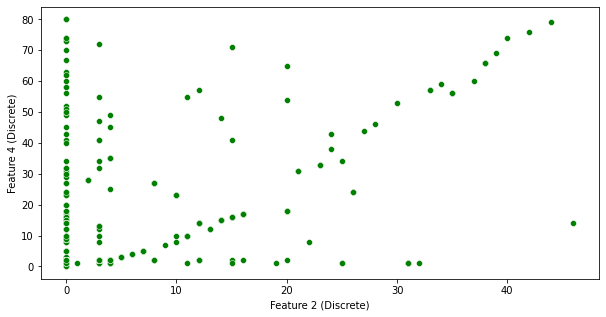

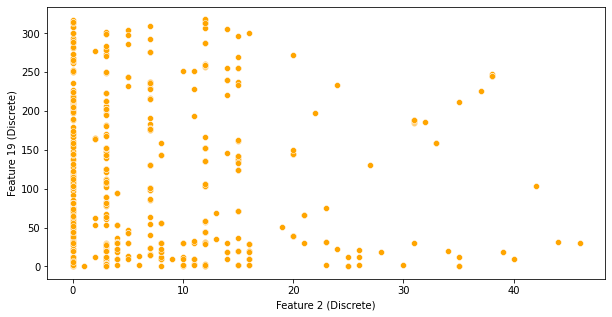

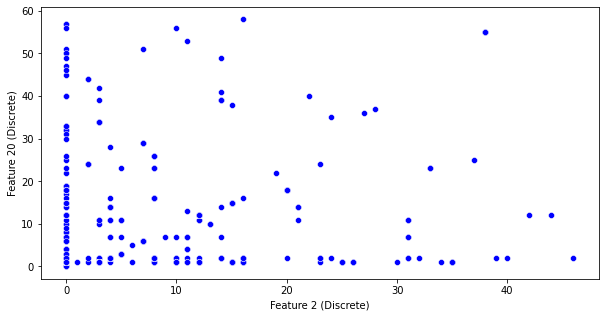

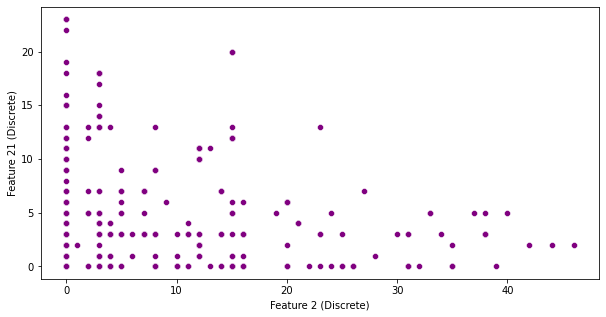

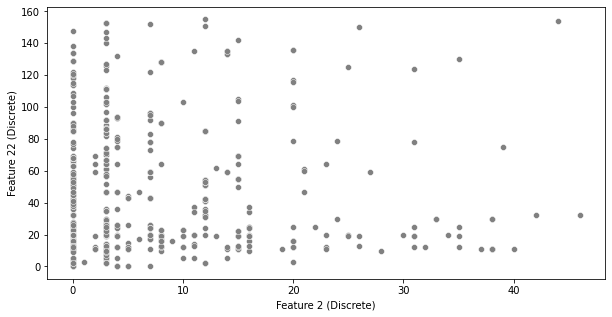

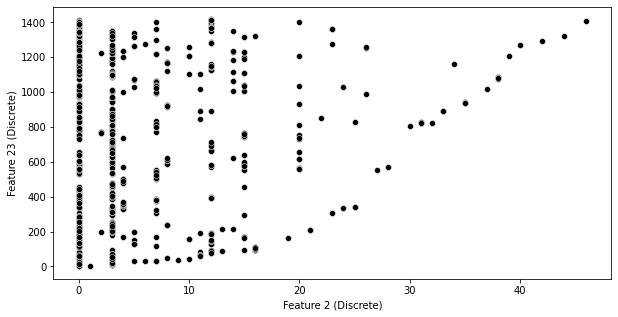

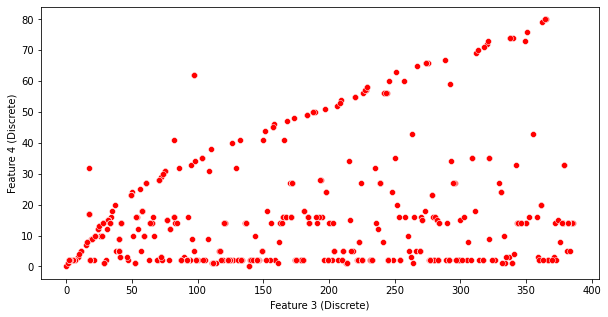

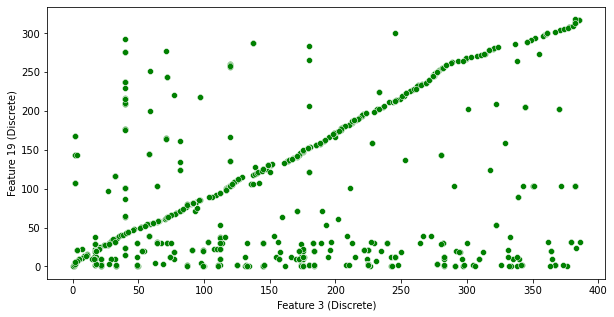

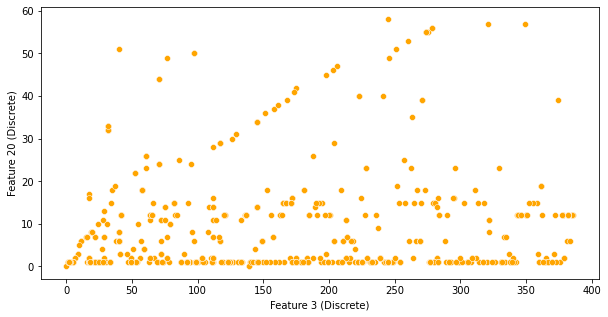

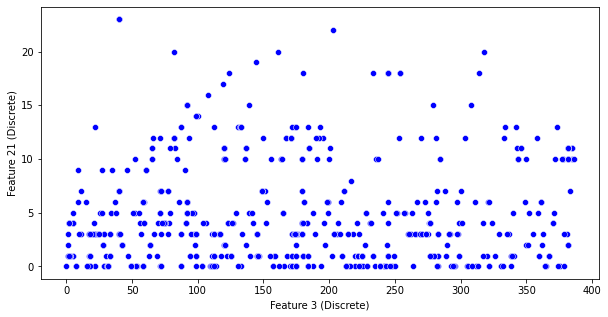

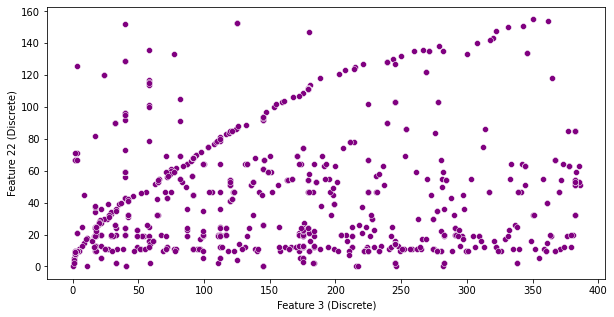

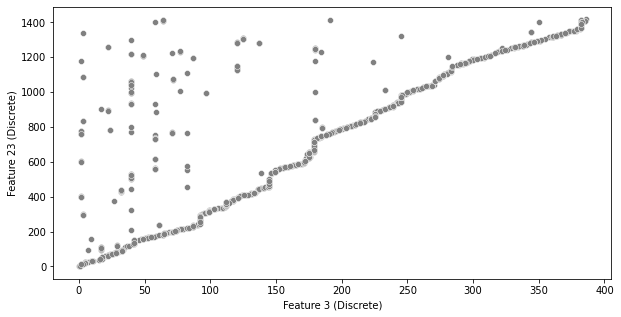

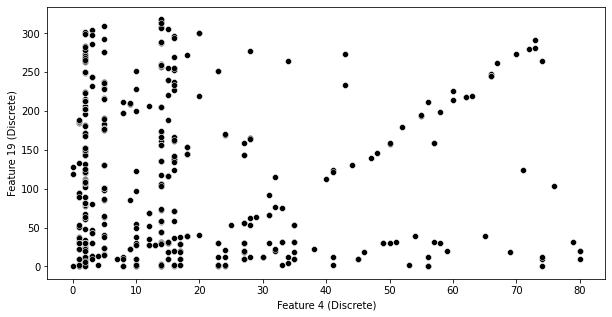

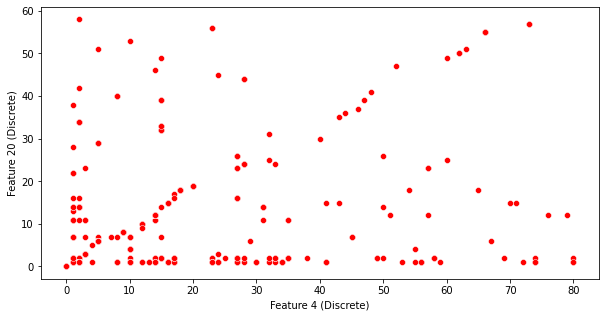

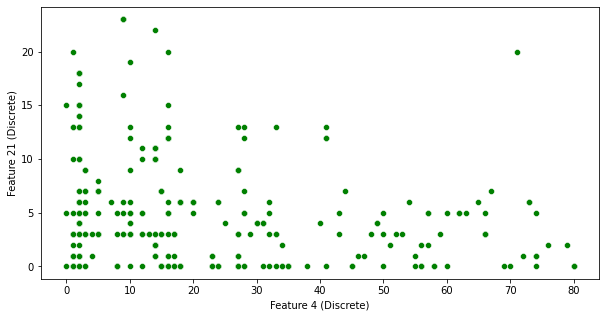

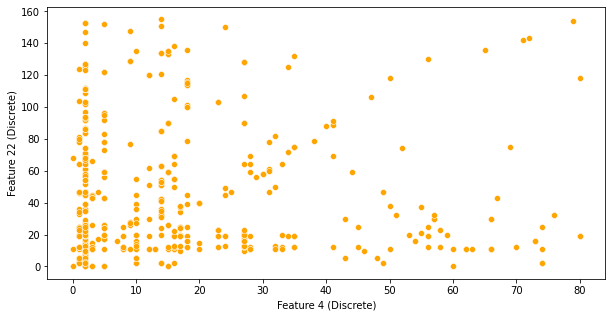

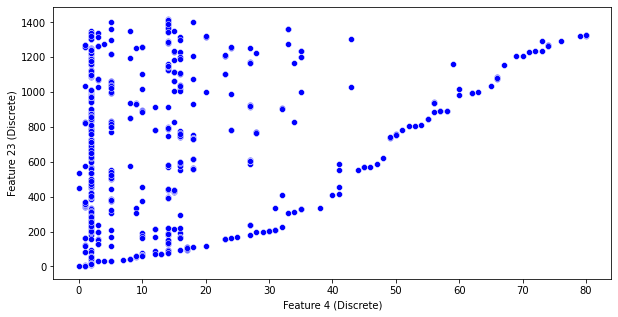

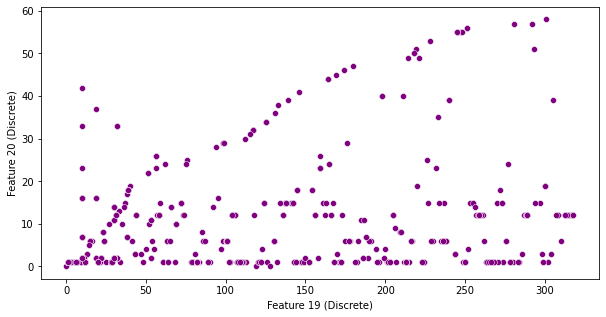

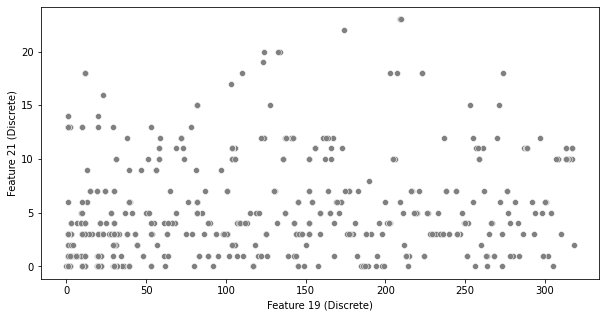

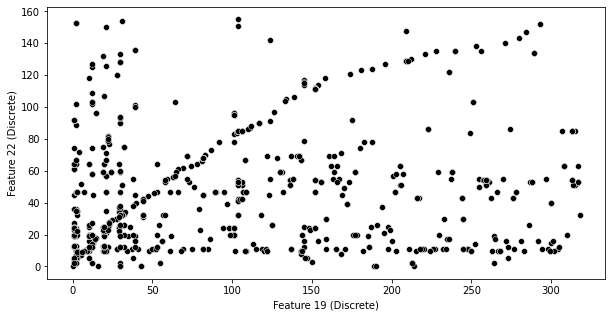

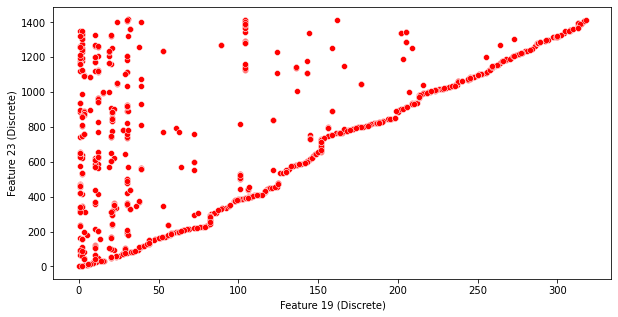

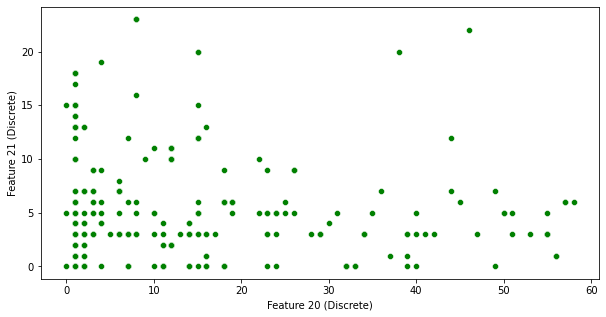

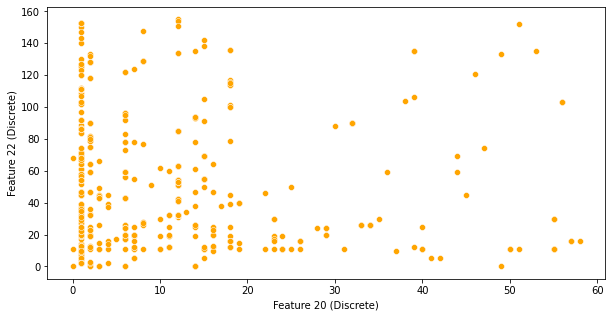

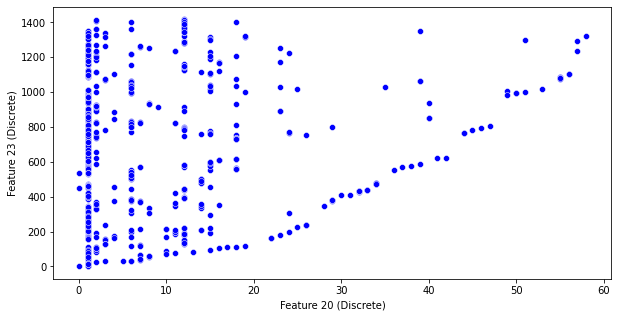

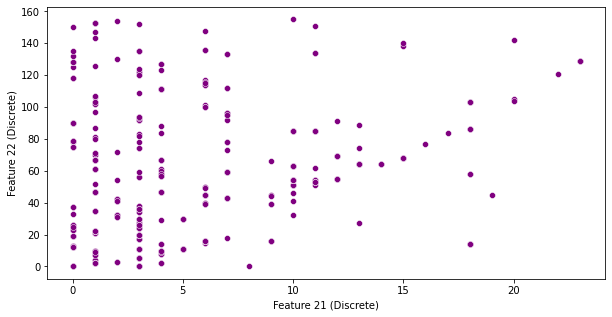

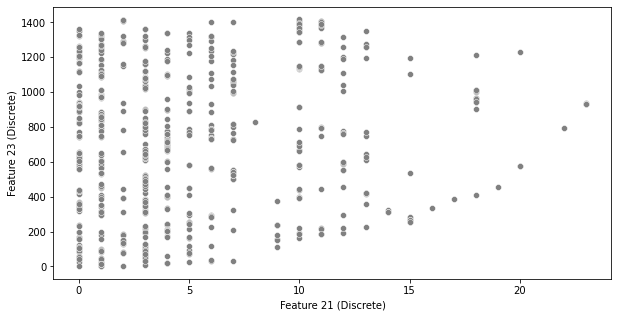

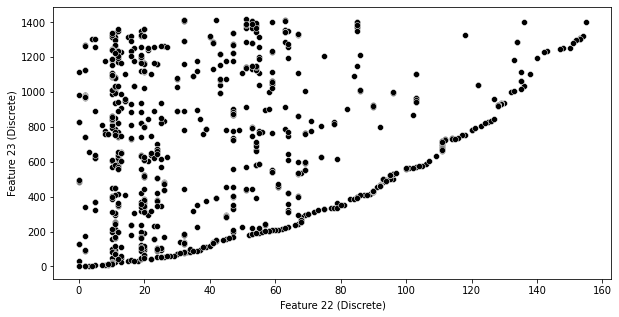

In [ ]:
def scatterplot(col1,col2,c):
  """
  input : col1 : along x axis 
          col2 : along y axis 
             c : color to plot the scatter plot
  plots : scatter plot of given two features col1 and col2
  """
  plt.figure(figsize=(10,5))
  sns.scatterplot(x=col1,y=col2,data=train_df,color=c)
color=['black','red','green','orange','blue','purple','grey']
c=0
for i in range(len(discrete_cont)-1):
  for j in range(i+1,len(discrete_cont)):
    scatterplot(discrete_cont[i],discrete_cont[j],color[c])
    c+=1
    if c>6:
      c=0


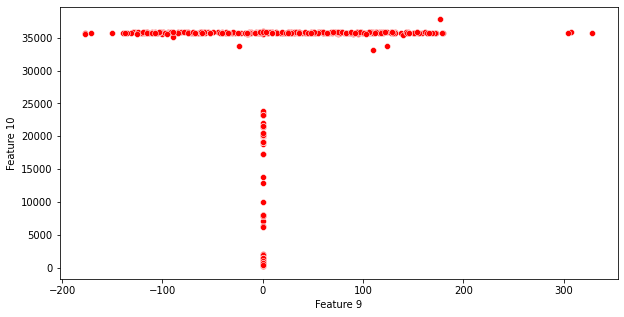

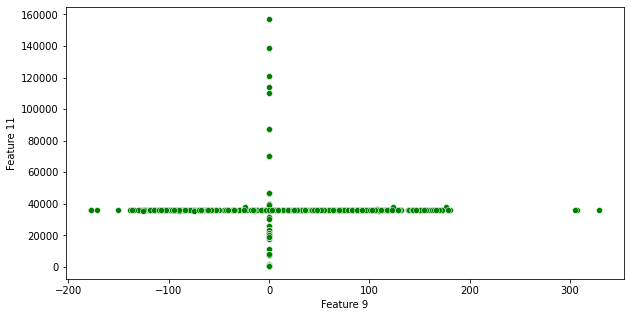

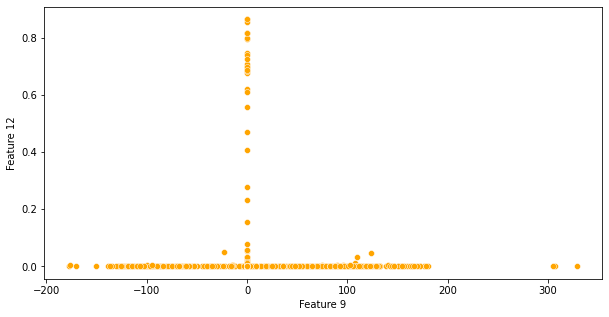

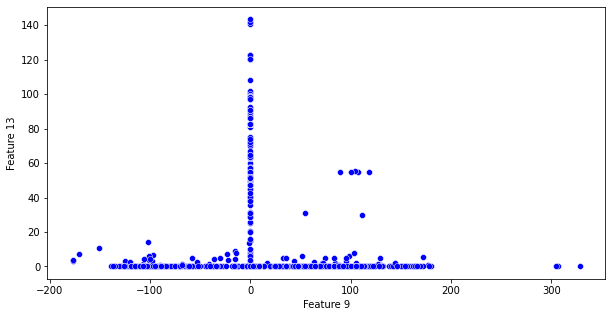

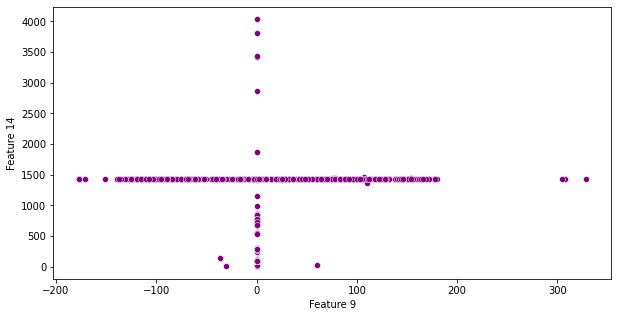

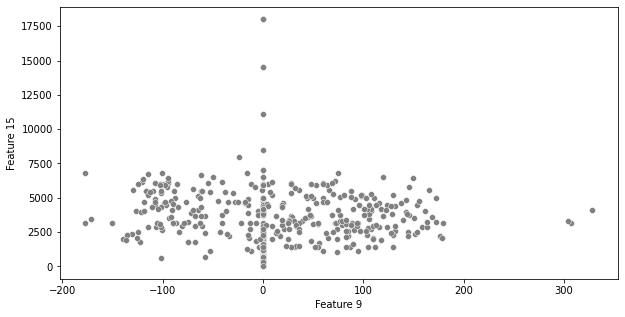

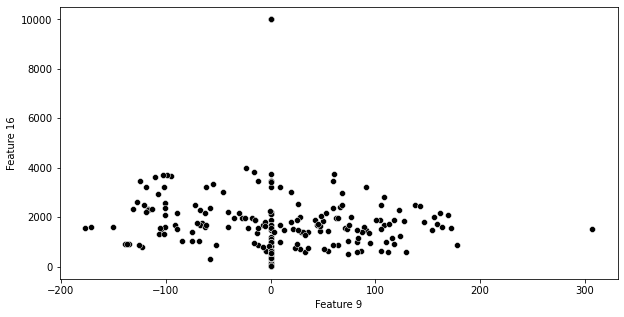

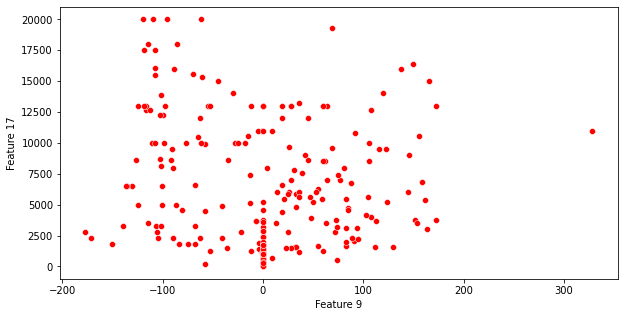

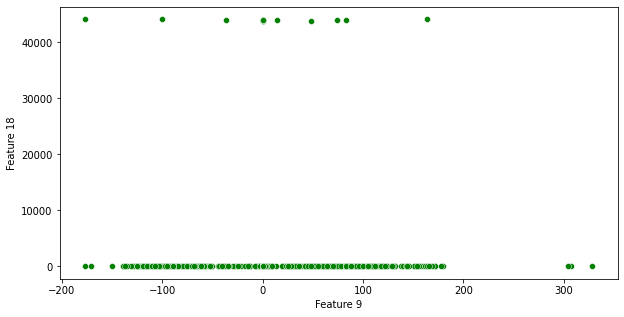

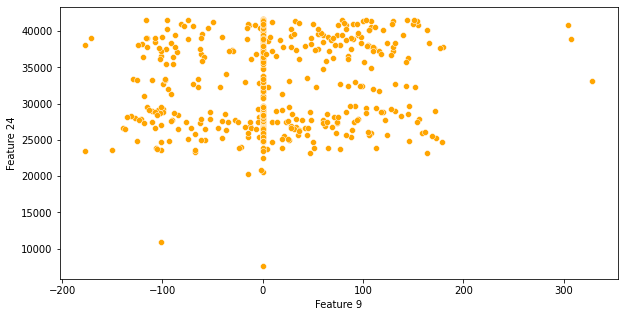

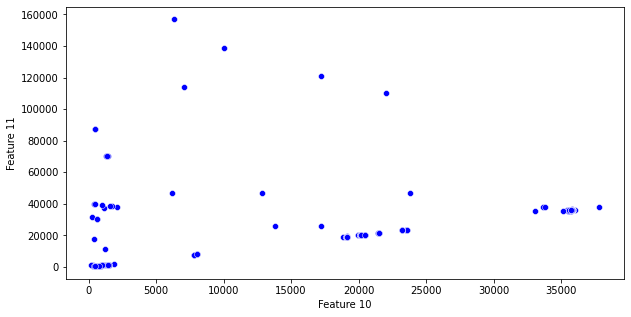

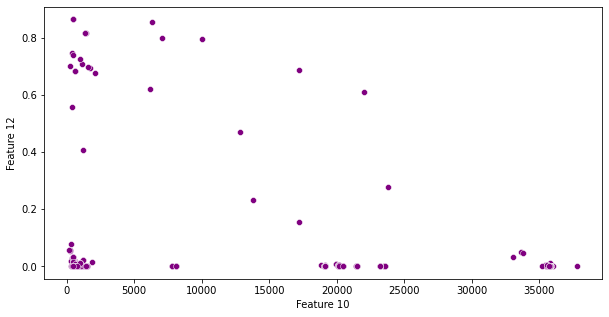

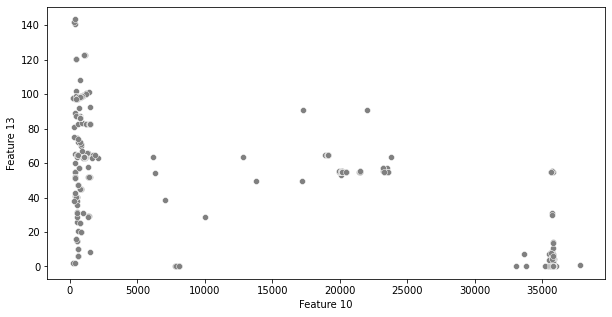

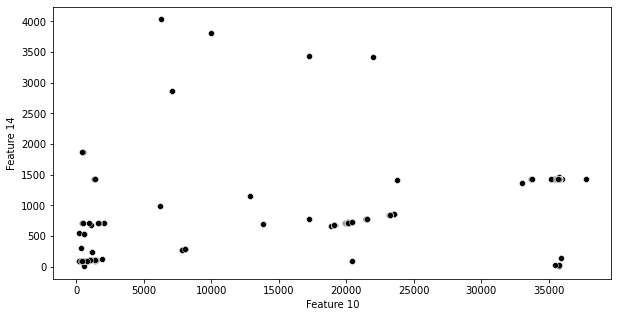

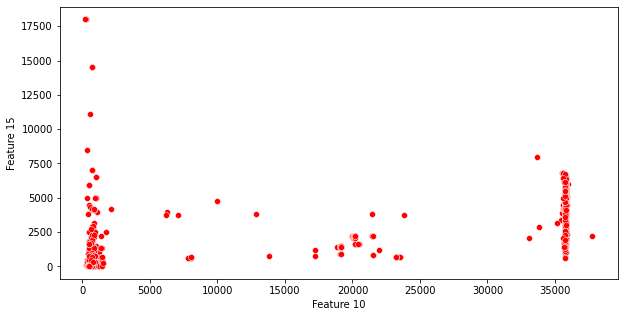

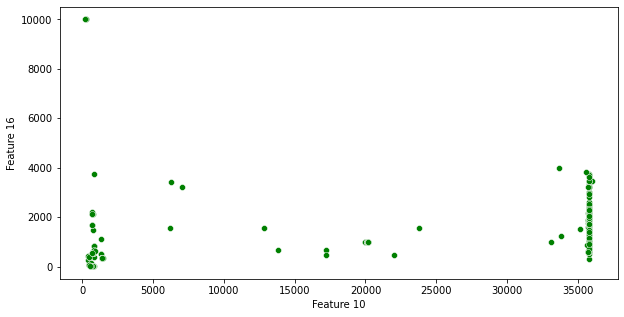

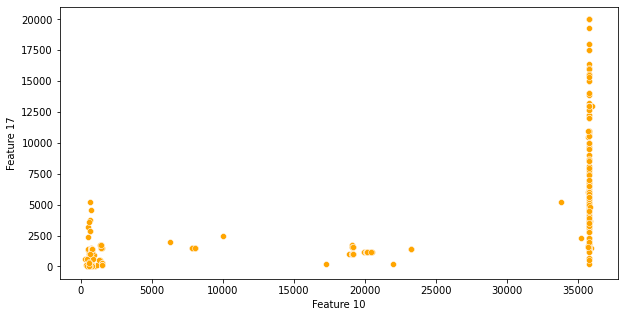

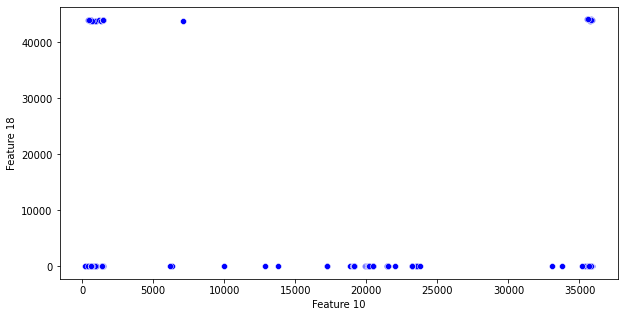

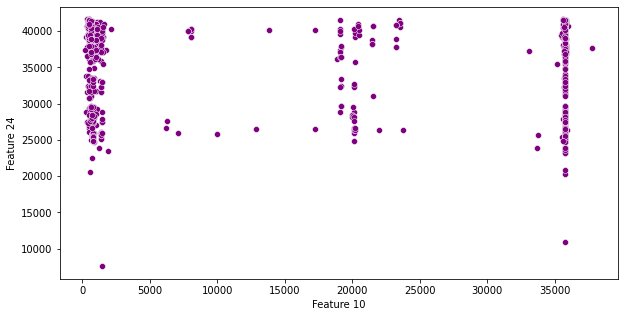

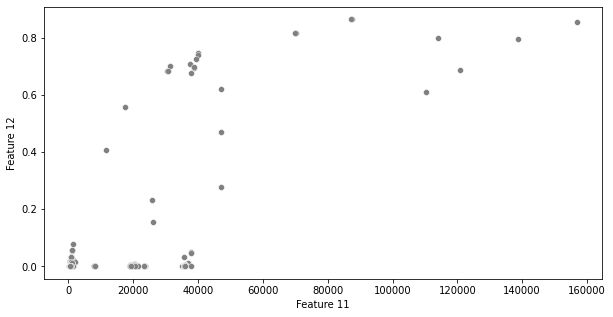

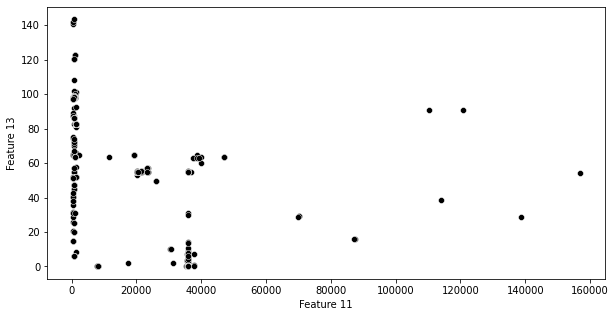

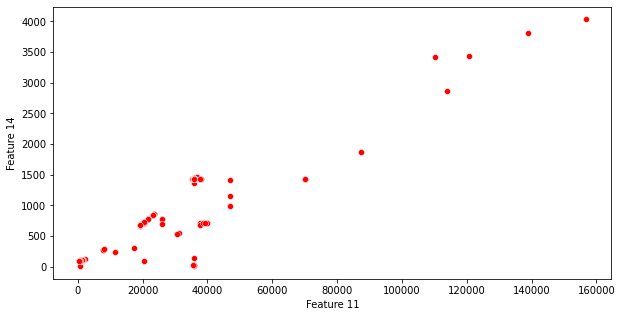

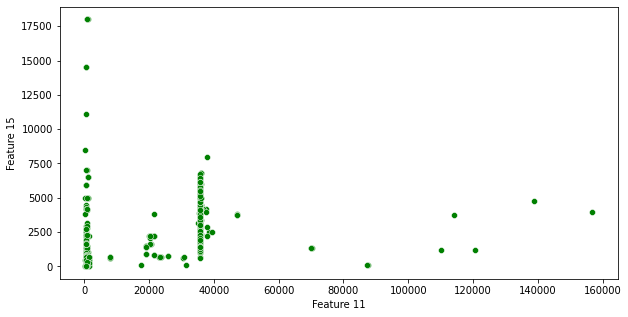

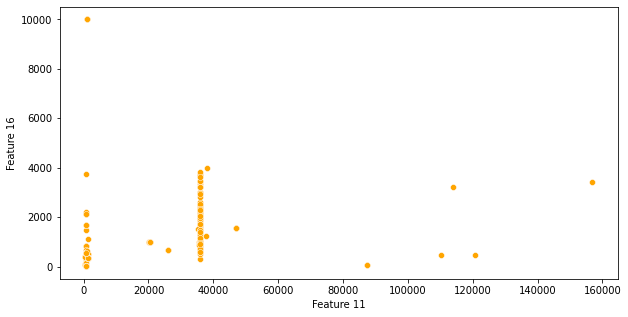

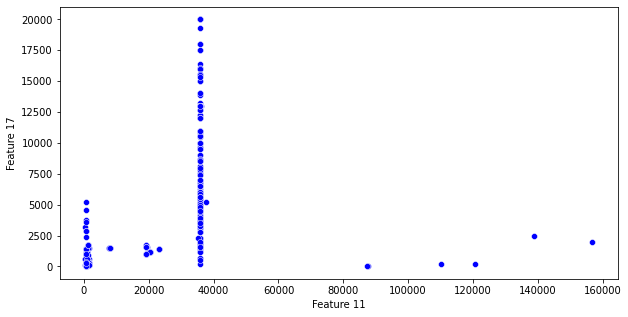

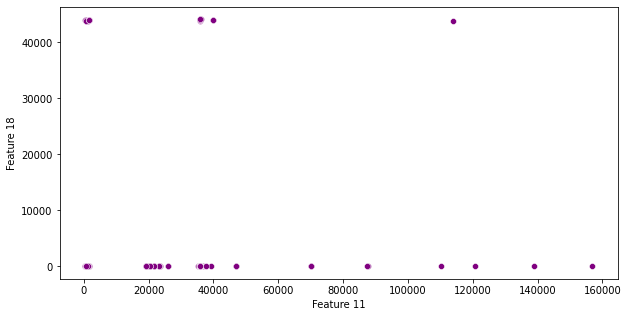

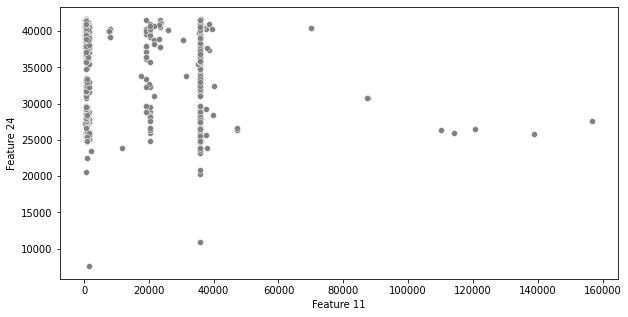

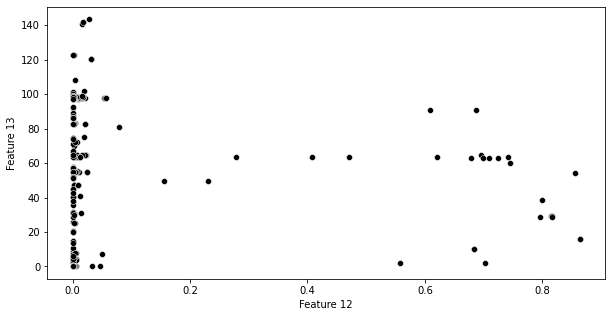

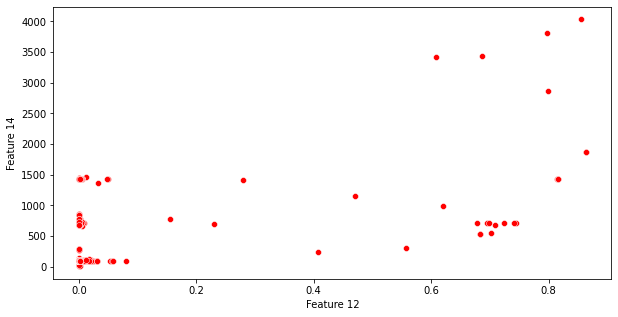

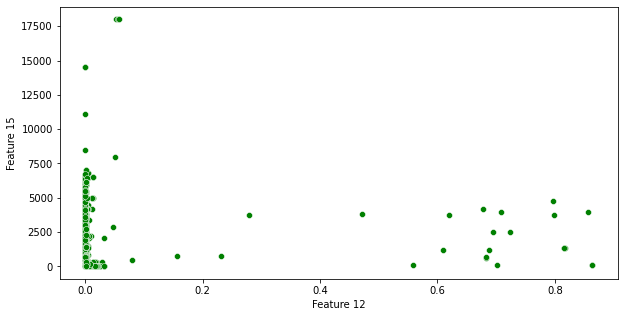

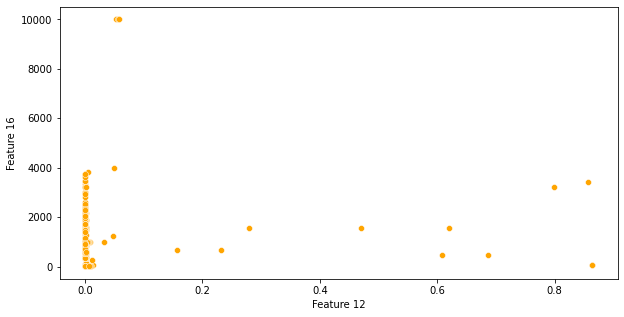

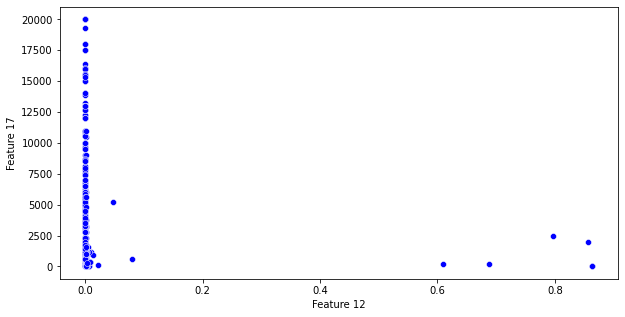

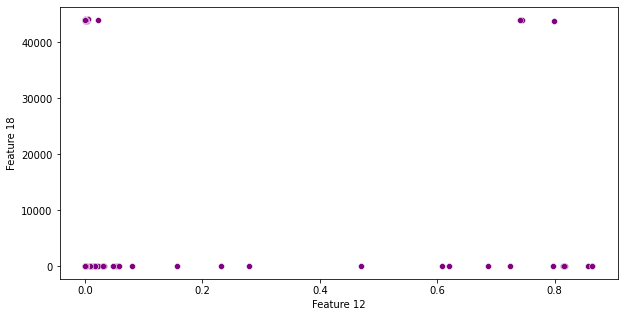

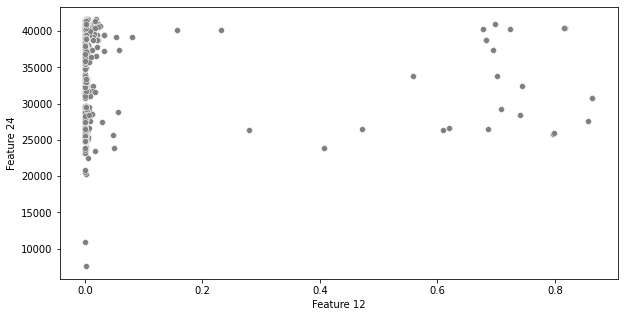

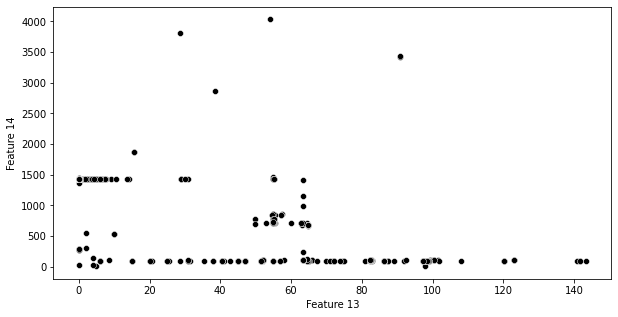

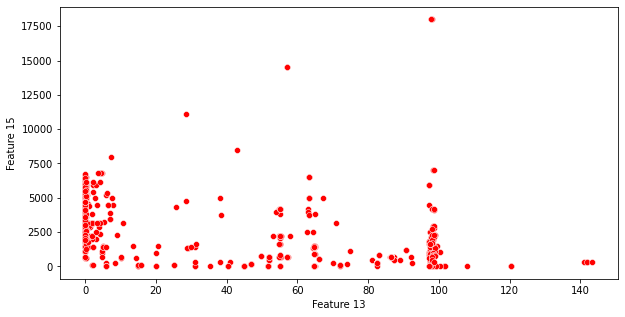

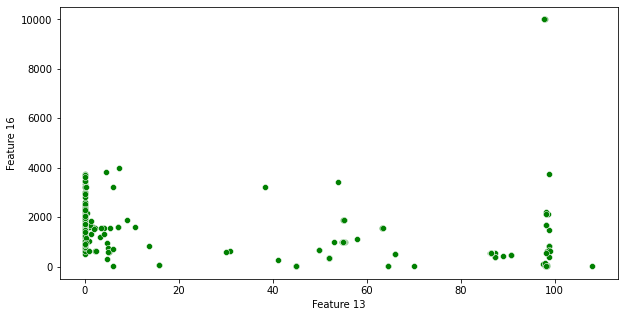

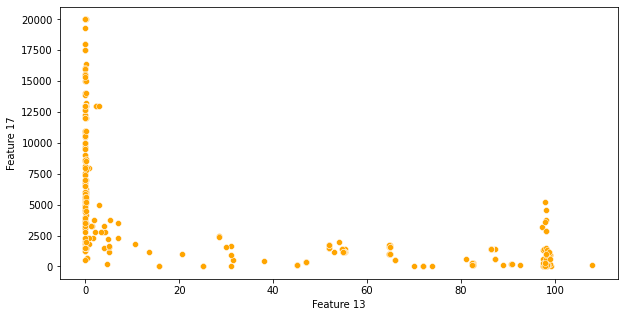

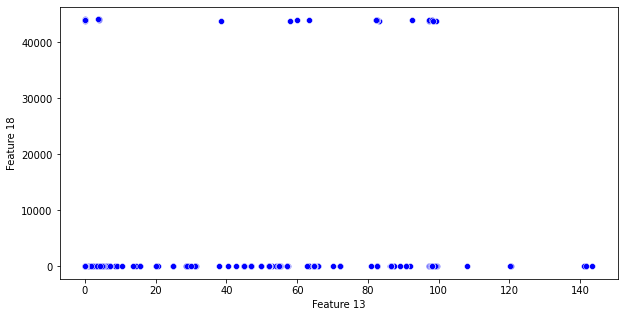

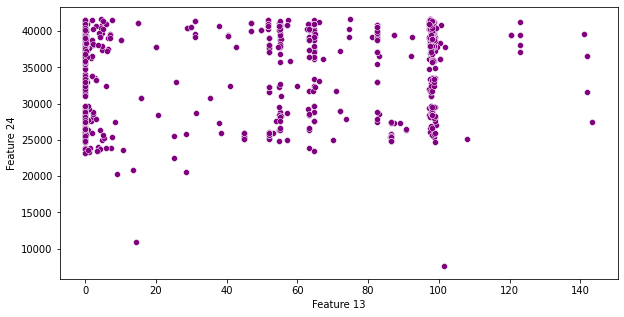

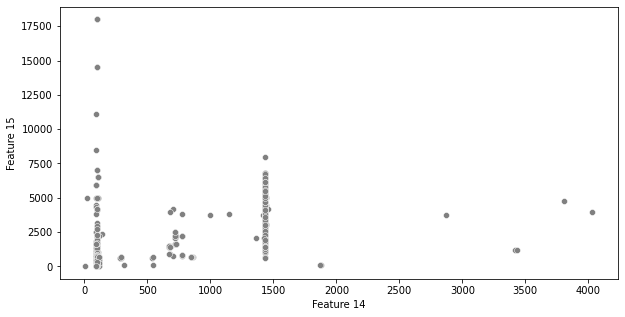

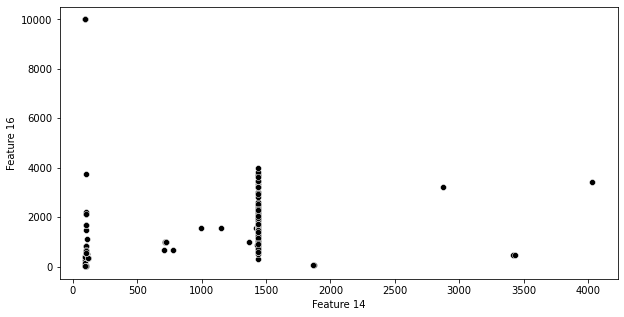

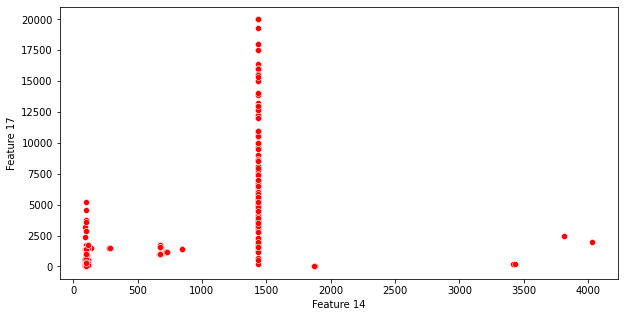

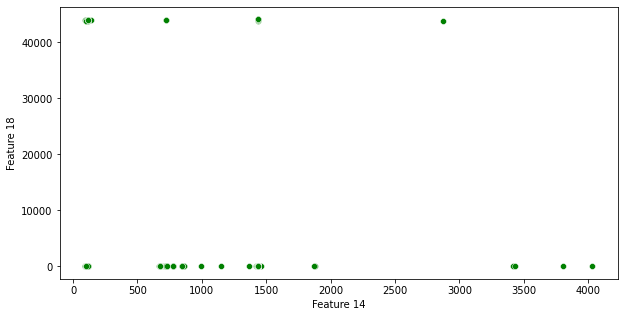

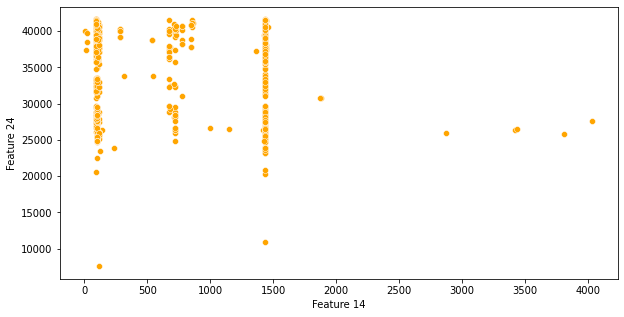

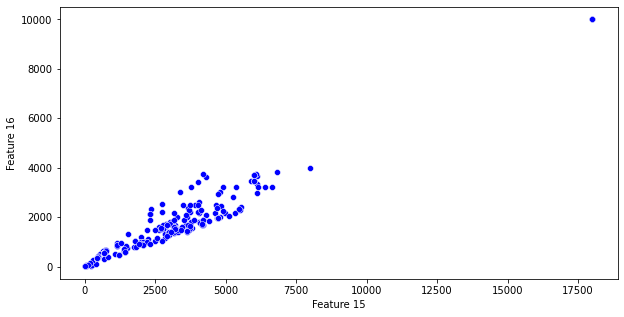

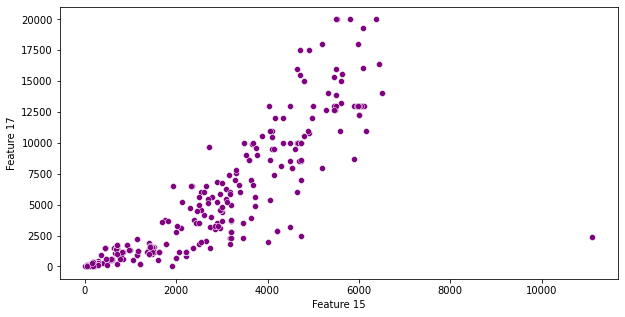

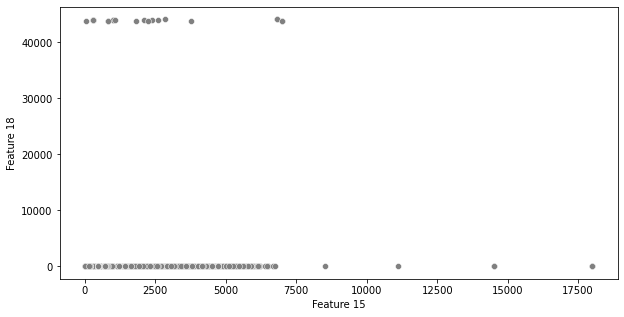

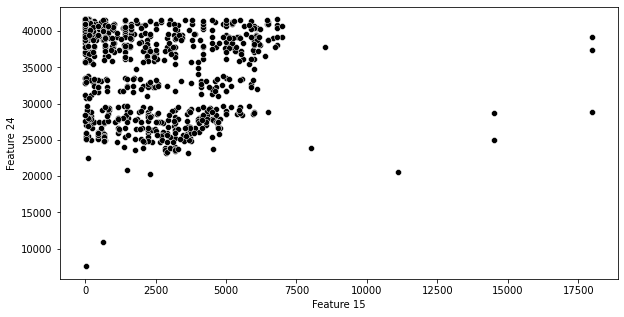

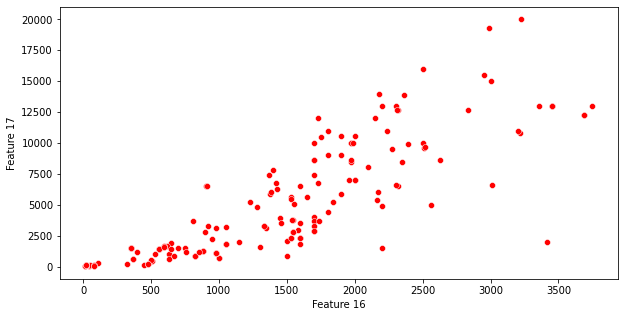

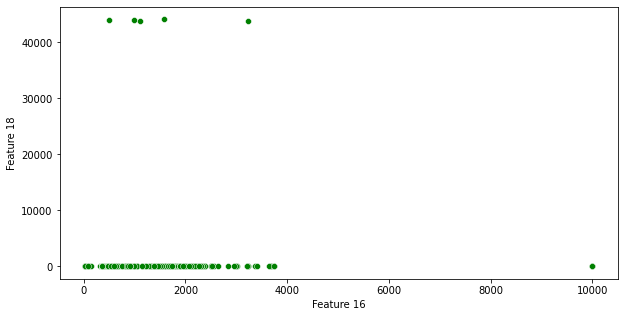

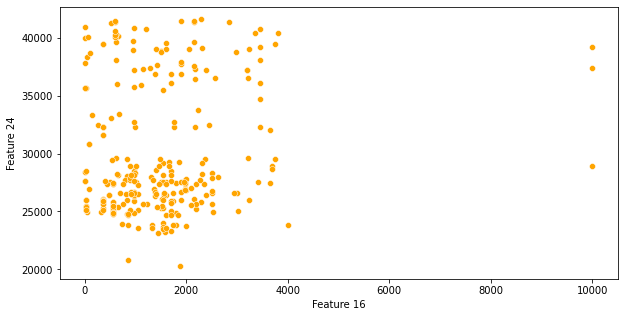

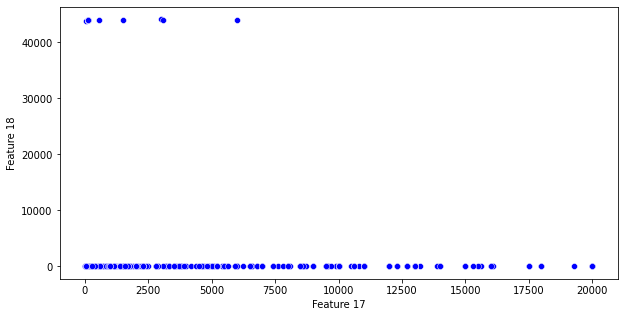

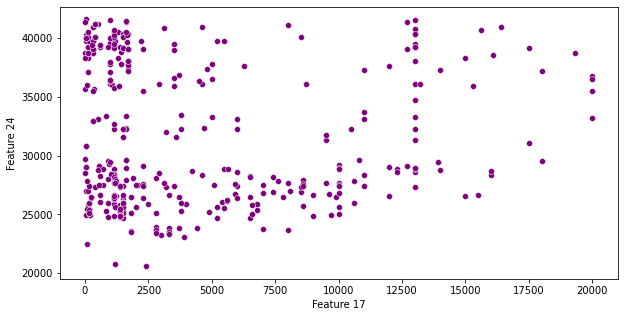

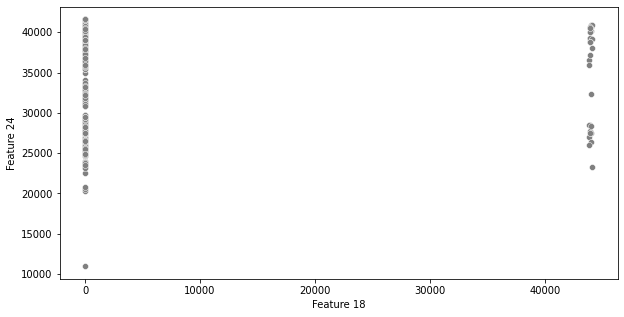

In [ ]:
for i in range(len(continuous_cols)-1):
  for j in range(i+1,len(continuous_cols)):
    scatterplot(continuous_cols[i],continuous_cols[j],color[c])
    c+=1
    if c>6:
      c=0

**Note :**

1. We could not see much correlation among continuous features.

2. Features (15,16),(15,17) are correlated among all the combinations of continuous features

In [ ]:
# non_categorical cols
non_cat=continuous_cols
non_cat.extend(discrete_cont)

In [ ]:
def histogram(col):
  """
  input : col - feature
  plots : distplot,rug plot and kde plot for given input feature(col)
  """
  plt.figure(figsize=(10,5))
  fig, ((ax1,ax2,ax3)) = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
  sns.distplot(train_df[col],kde=False,rug=False,ax=ax1,color='black')
  sns.distplot(train_df[col],kde=True,rug=False,ax=ax2,color='red')
  sns.distplot(train_df[col],kde=True,rug=True,ax=ax3,color='green')

<Figure size 720x360 with 0 Axes>

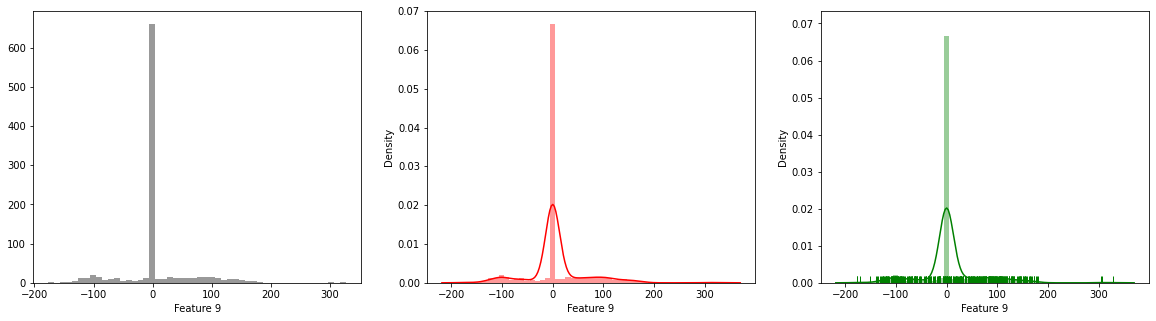

<Figure size 720x360 with 0 Axes>

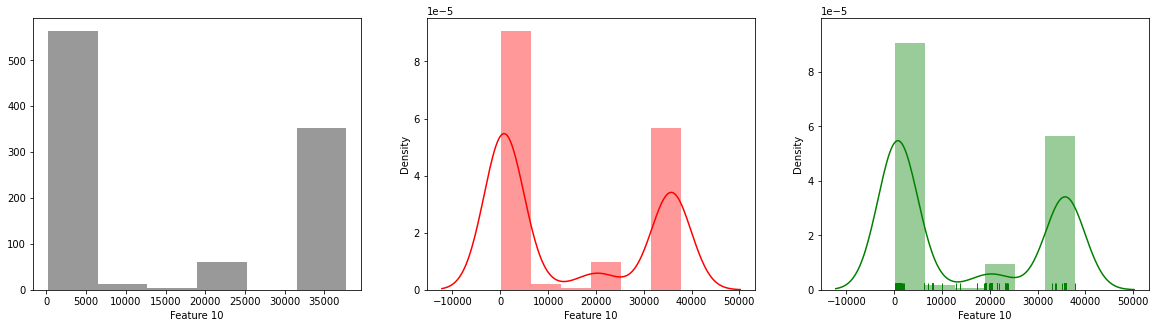

<Figure size 720x360 with 0 Axes>

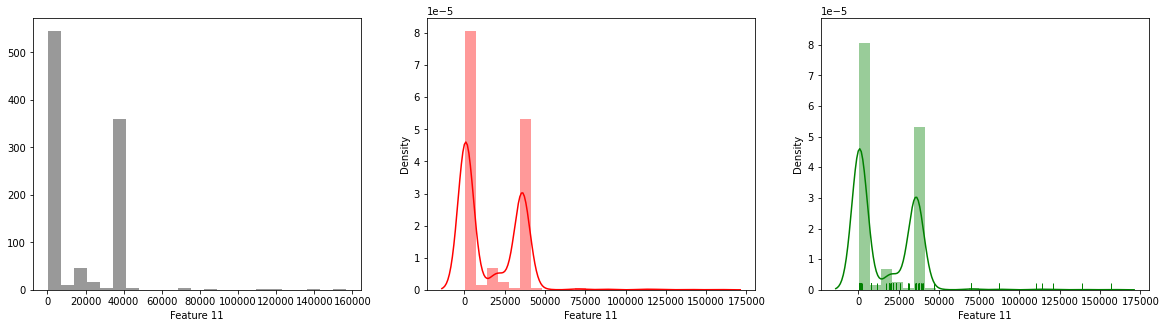

<Figure size 720x360 with 0 Axes>

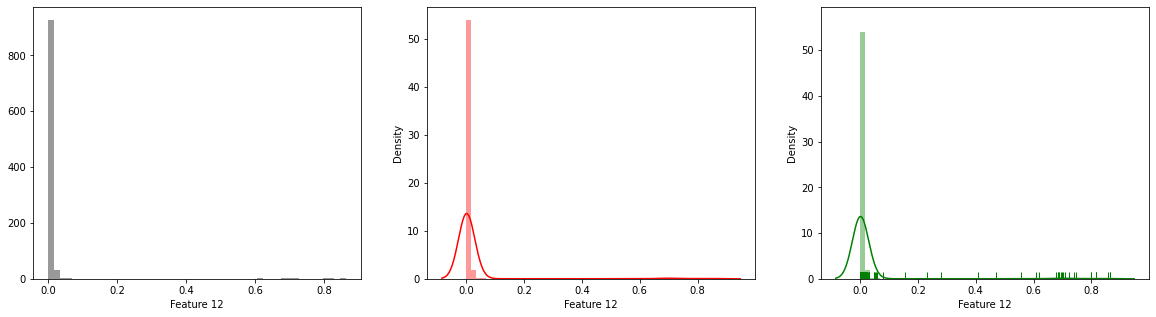

<Figure size 720x360 with 0 Axes>

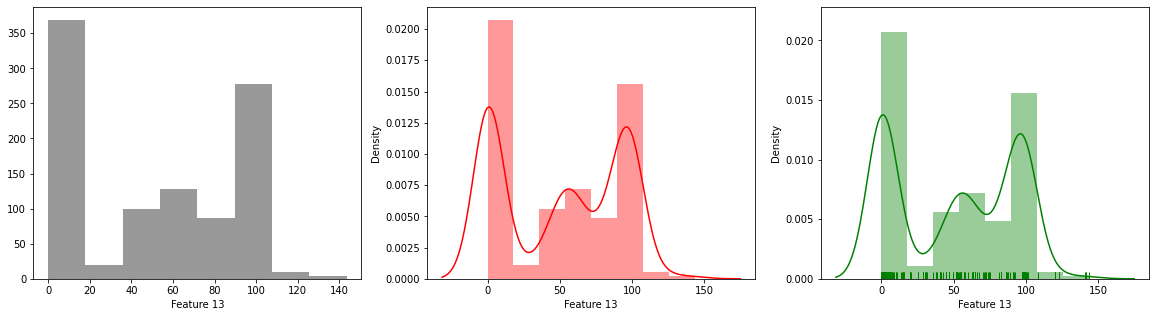

<Figure size 720x360 with 0 Axes>

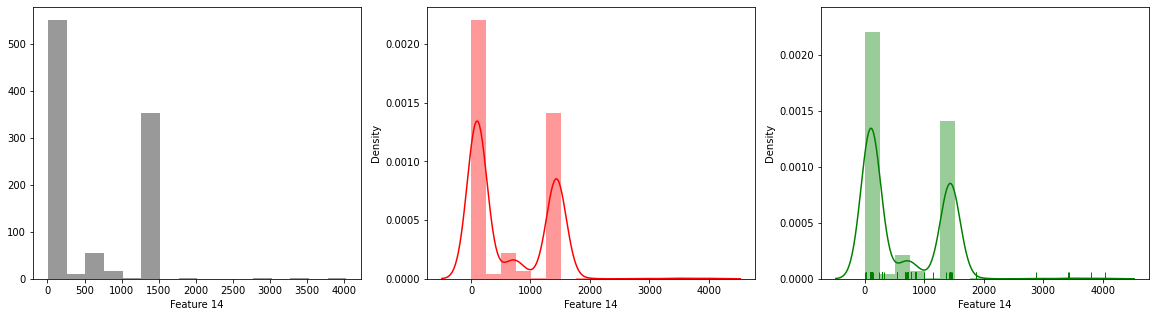

<Figure size 720x360 with 0 Axes>

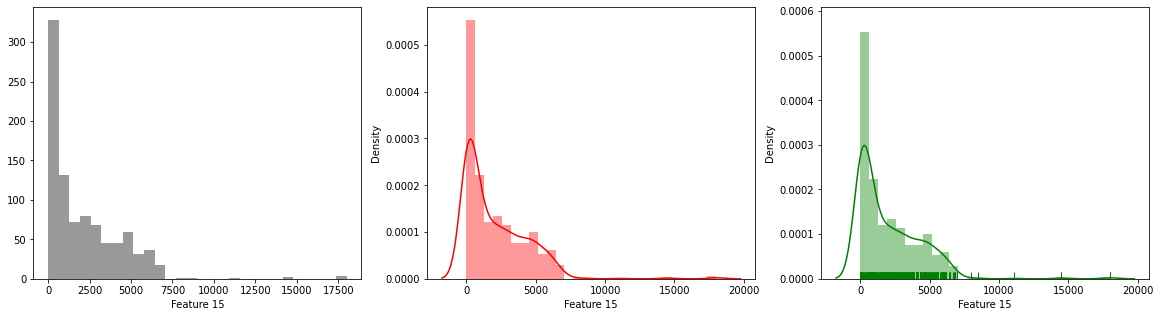

<Figure size 720x360 with 0 Axes>

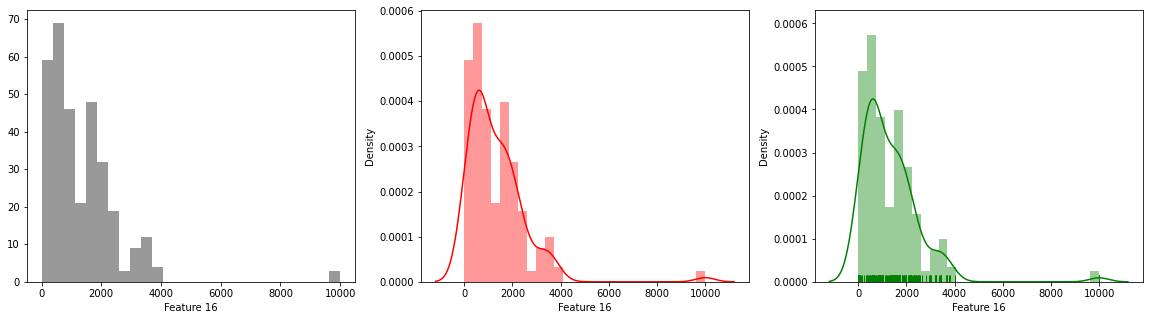

<Figure size 720x360 with 0 Axes>

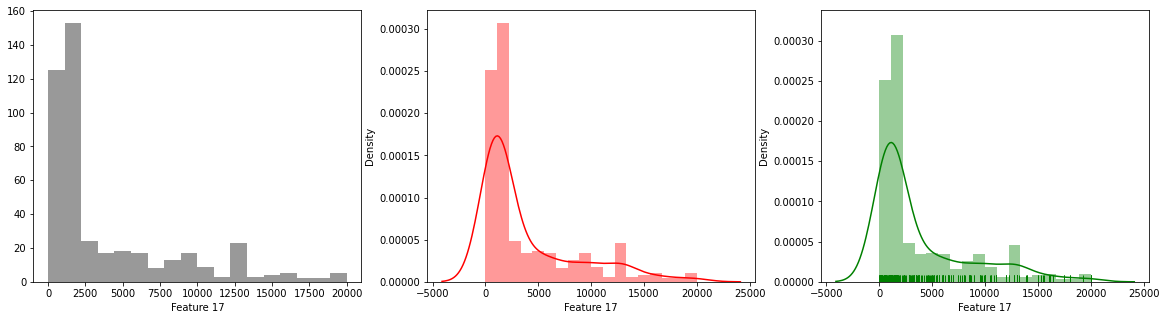

<Figure size 720x360 with 0 Axes>

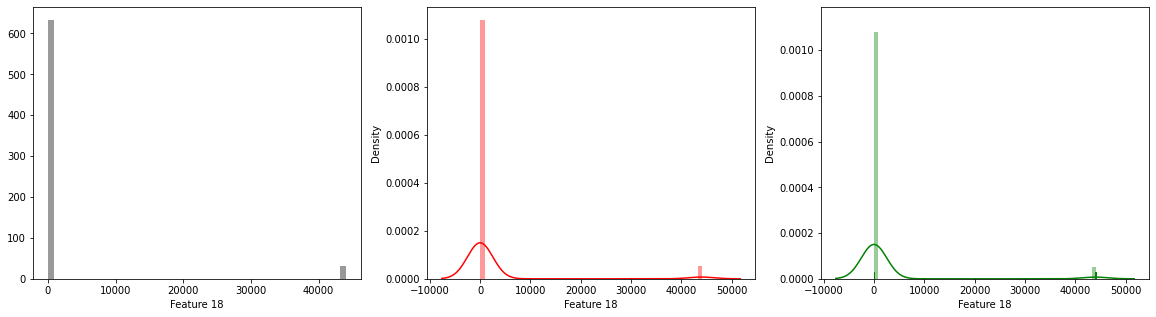

<Figure size 720x360 with 0 Axes>

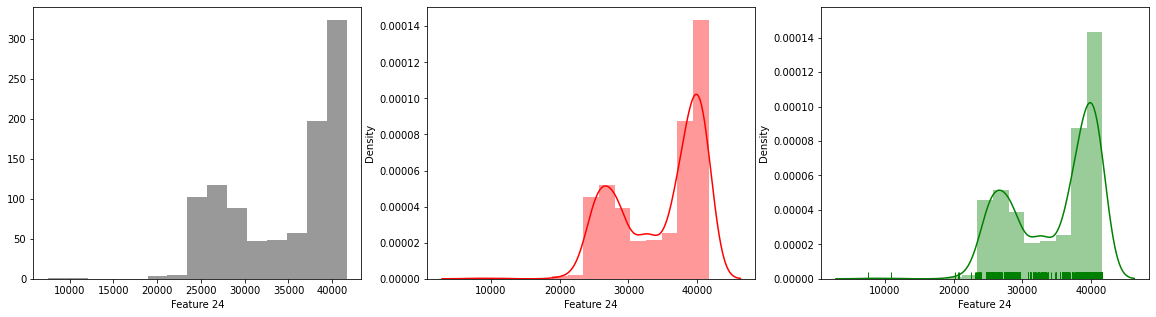

<Figure size 720x360 with 0 Axes>

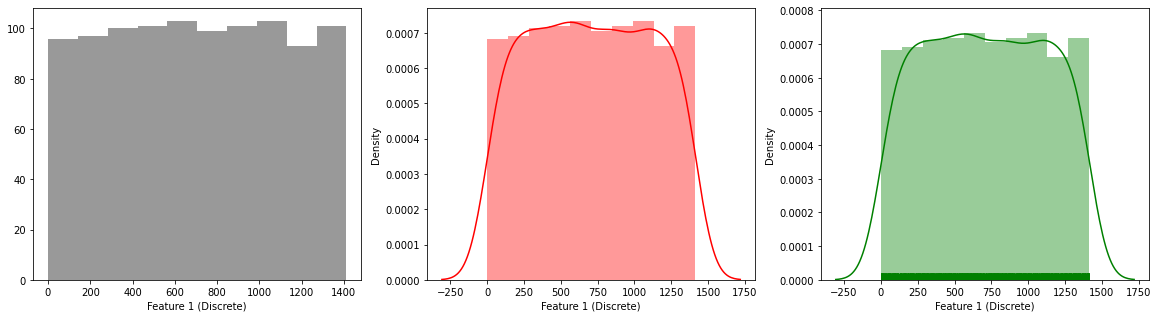

<Figure size 720x360 with 0 Axes>

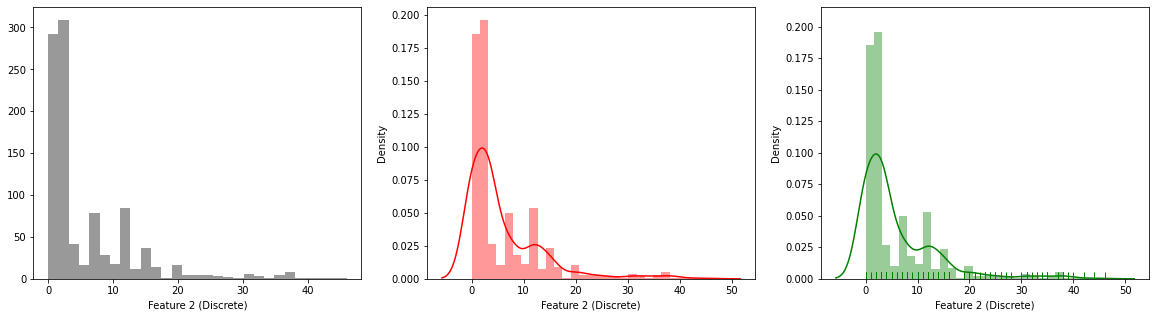

<Figure size 720x360 with 0 Axes>

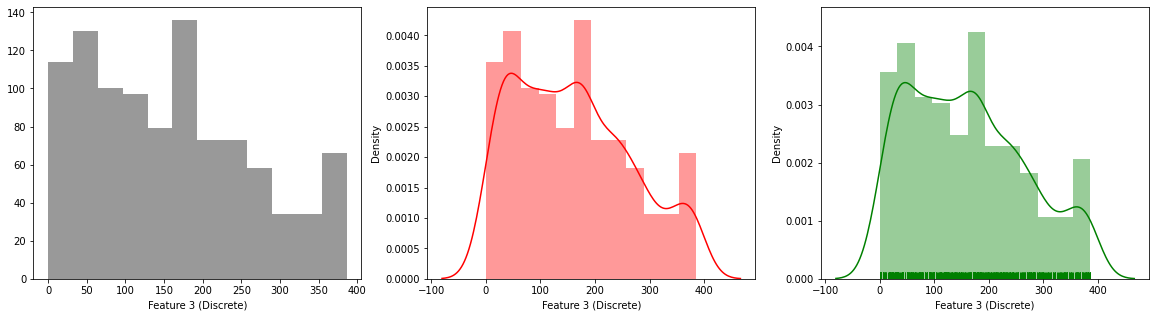

<Figure size 720x360 with 0 Axes>

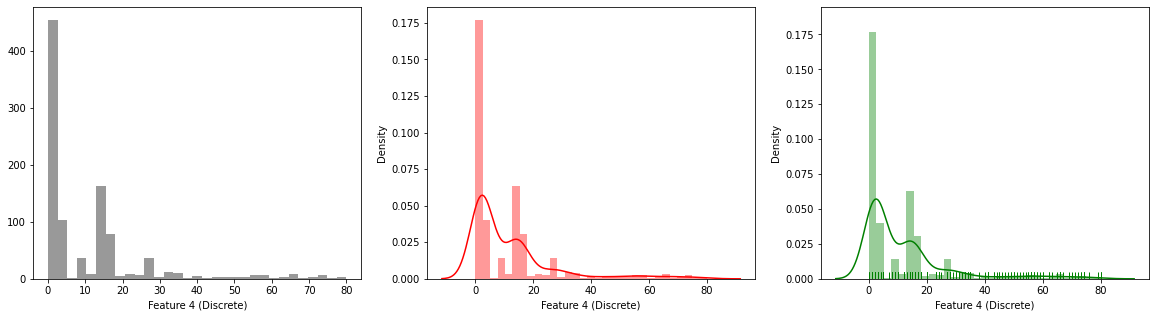

<Figure size 720x360 with 0 Axes>

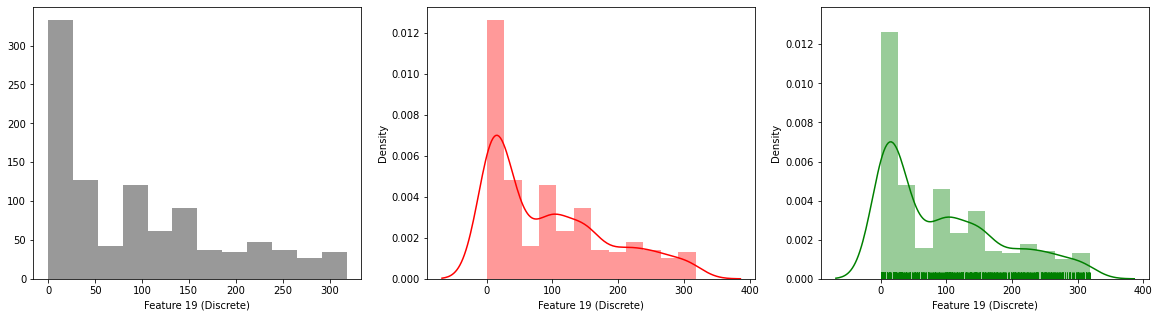

<Figure size 720x360 with 0 Axes>

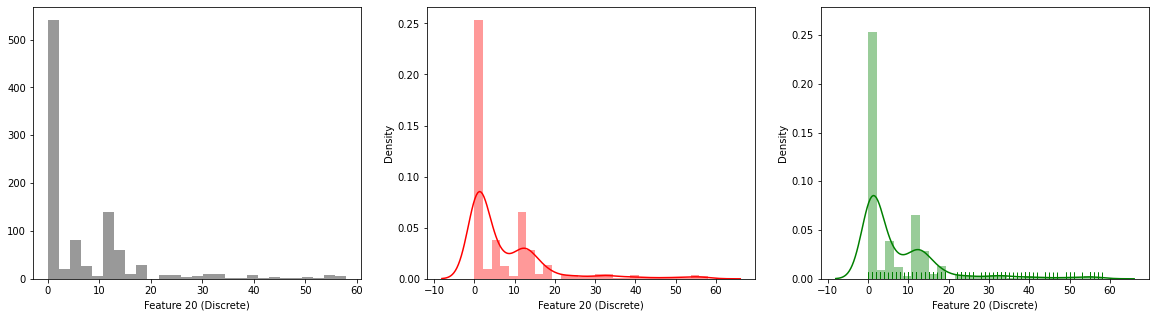

<Figure size 720x360 with 0 Axes>

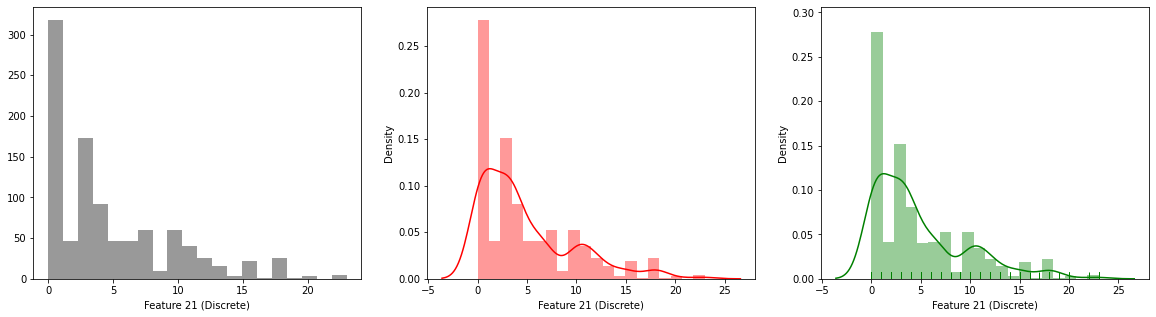

<Figure size 720x360 with 0 Axes>

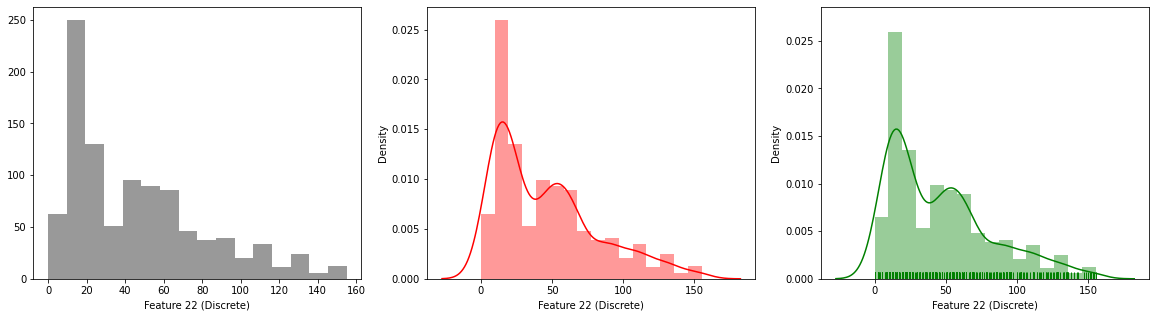

<Figure size 720x360 with 0 Axes>

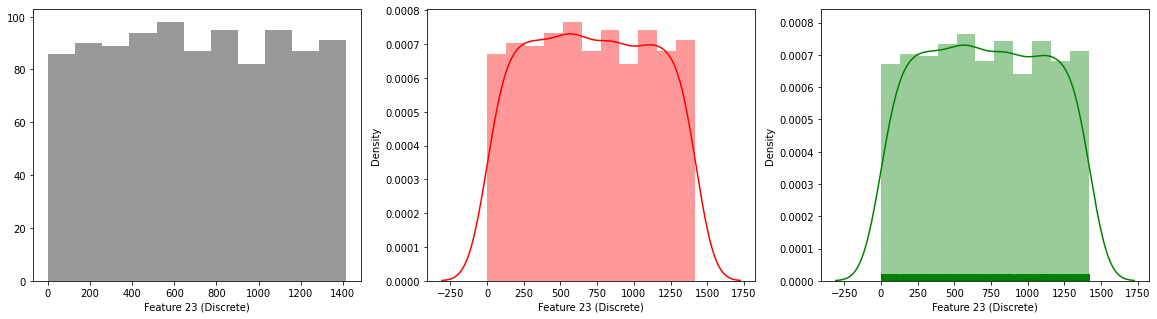

In [ ]:
for x in non_cat:
  histogram(x)


**Note :**

1. Some of the features such as Feature 2,17,19 etc were Right Skewed.

2. Feature 24 has left skewed distribution.

3. Features 1,23 must be a random distribution. 

4. Some features (22,20,24) have bimodal distribution 

In [ ]:
def BoxViolinPlots(col):
  """
  input : col - feature 
  plots : boxplots and violin plots to visualize outliers 
  """
  plt.figure(figsize=(10,5))
  fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
  sns.boxplot(y=train_df[col],ax=ax1,color='orange')
  sns.violinplot(y=train_df[col],ax=ax2,color='red')
  ax1.set_xlabel(col)
  ax1.set_ylabel("Observed Values")
  ax2.set_xlabel(col)
  ax2.set_ylabel("Observed Values")

<Figure size 720x360 with 0 Axes>

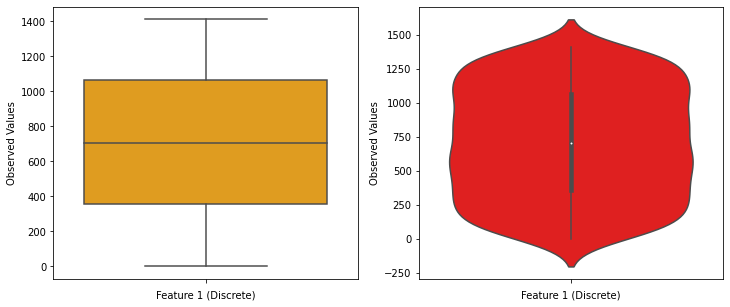

<Figure size 720x360 with 0 Axes>

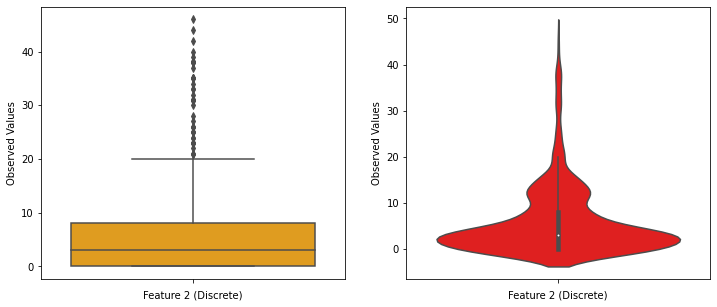

<Figure size 720x360 with 0 Axes>

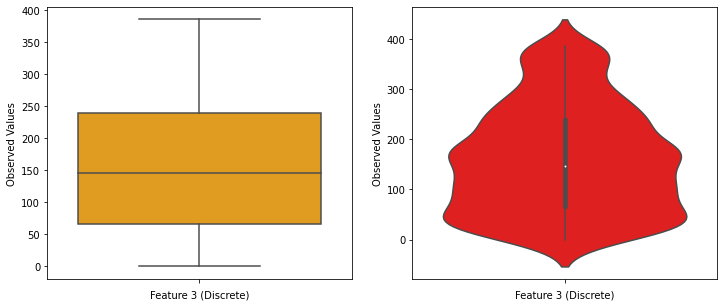

<Figure size 720x360 with 0 Axes>

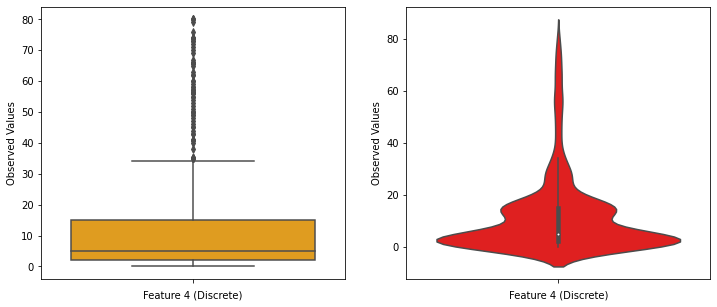

<Figure size 720x360 with 0 Axes>

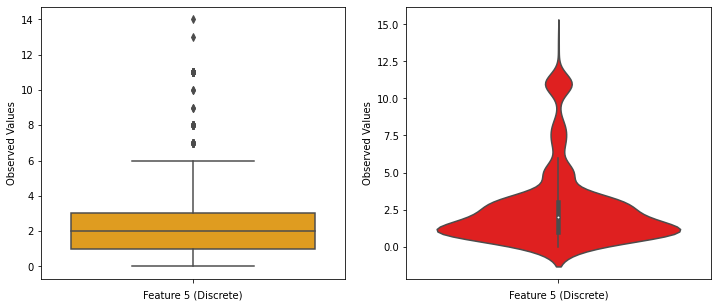

<Figure size 720x360 with 0 Axes>

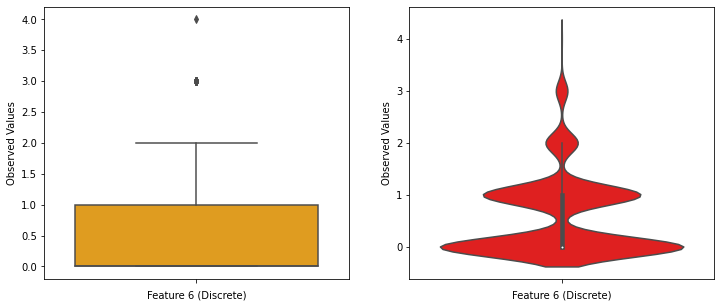

<Figure size 720x360 with 0 Axes>

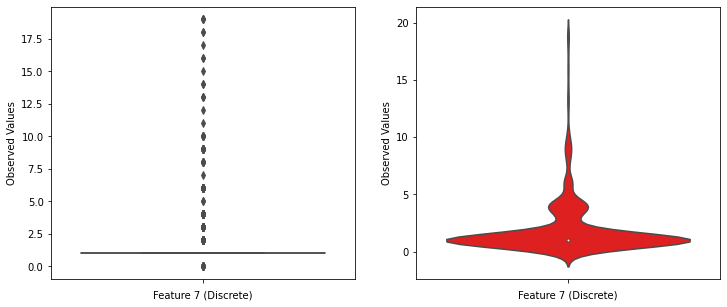

<Figure size 720x360 with 0 Axes>

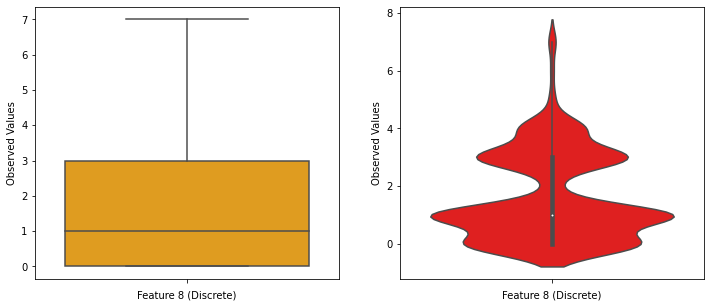

<Figure size 720x360 with 0 Axes>

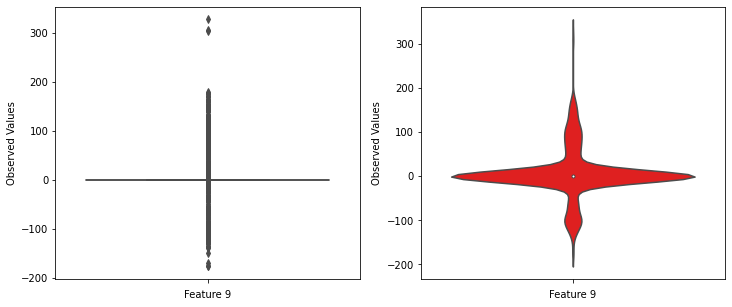

<Figure size 720x360 with 0 Axes>

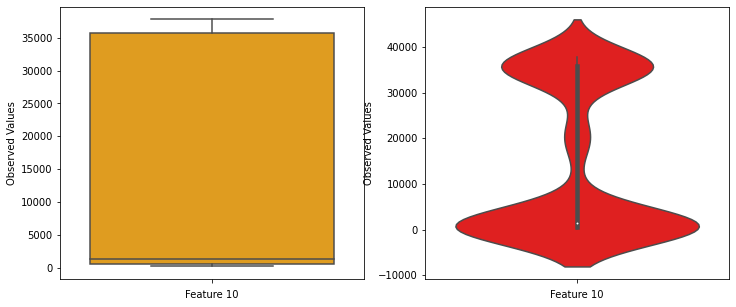

<Figure size 720x360 with 0 Axes>

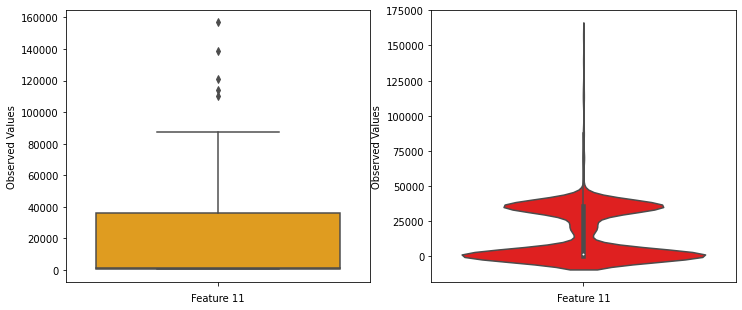

<Figure size 720x360 with 0 Axes>

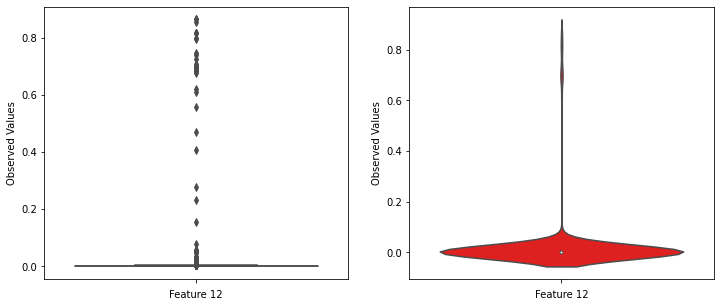

<Figure size 720x360 with 0 Axes>

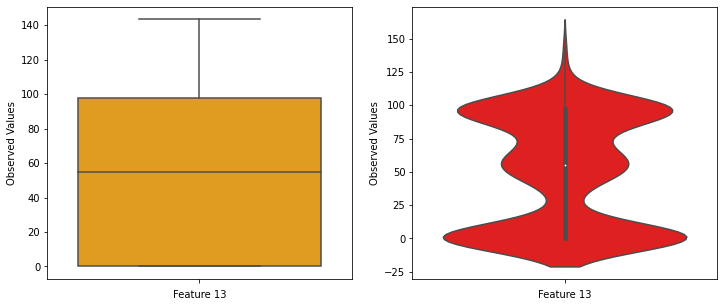

<Figure size 720x360 with 0 Axes>

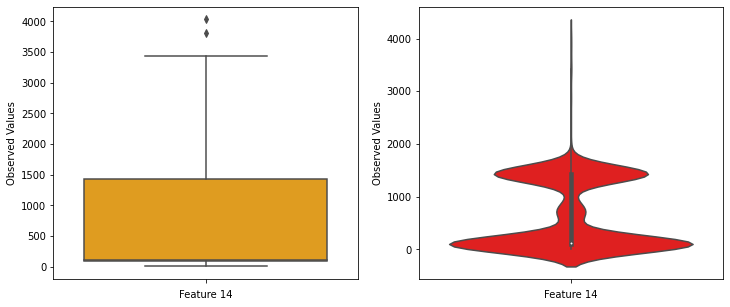

<Figure size 720x360 with 0 Axes>

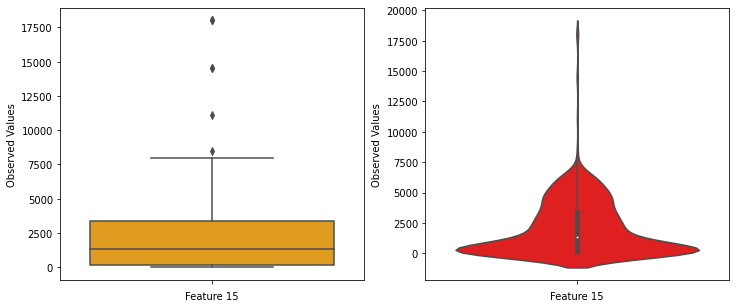

<Figure size 720x360 with 0 Axes>

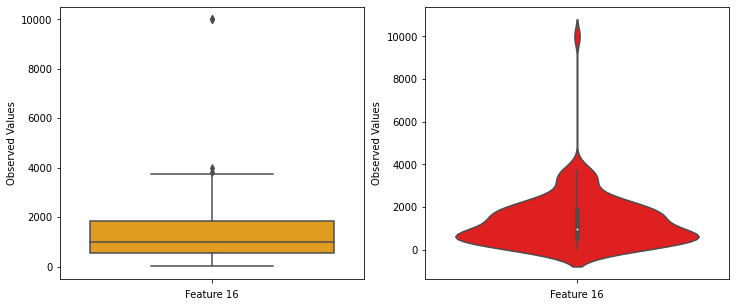

<Figure size 720x360 with 0 Axes>

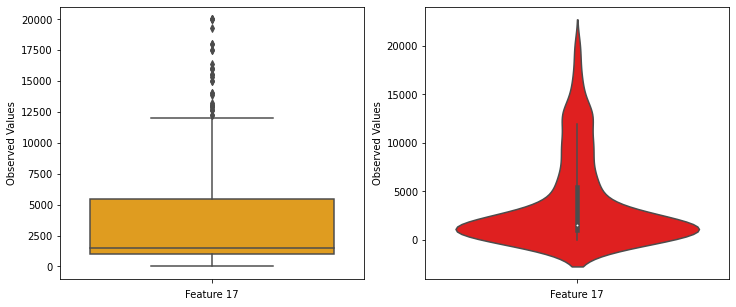

<Figure size 720x360 with 0 Axes>

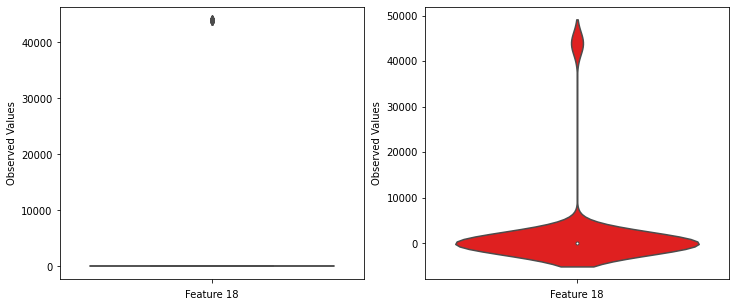

<Figure size 720x360 with 0 Axes>

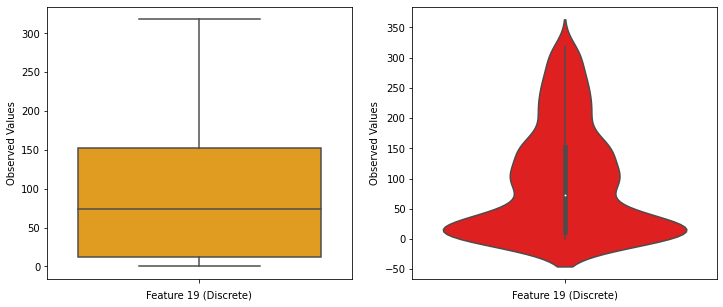

<Figure size 720x360 with 0 Axes>

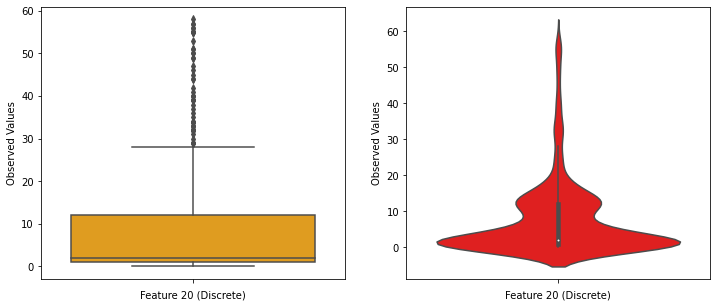

<Figure size 720x360 with 0 Axes>

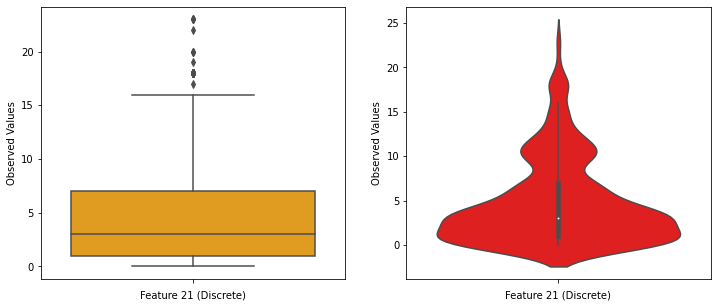

<Figure size 720x360 with 0 Axes>

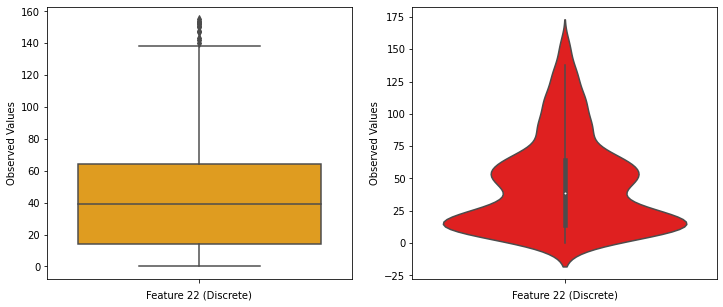

<Figure size 720x360 with 0 Axes>

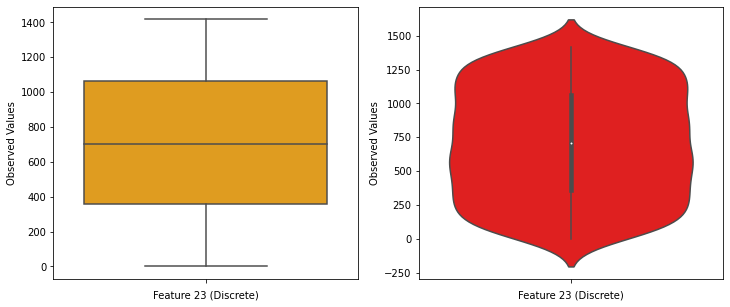

<Figure size 720x360 with 0 Axes>

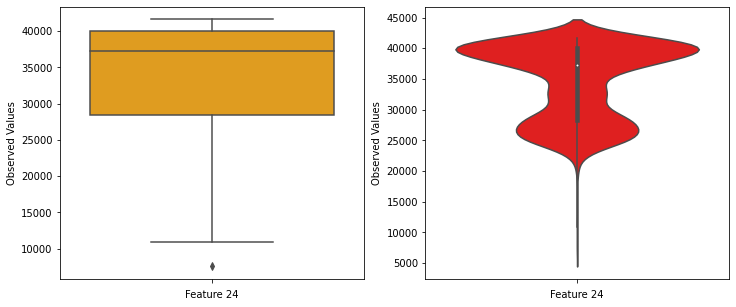

In [ ]:
for x in cols_train:
  BoxViolinPlots(x)


**Note :**

1. Both Box Plots and Violin Plots used to visualize the outliers.

2. Features (4,7,9,12,17,20) has many outlier points and we should check its impact on models while model building process.

## **DATA PREPROCESSING :**

### **Remove Highly Correlated Features:**

In [ ]:
# removing highly correlated data 
def return_uncorrelated_dataset(df,test,threshold):
  """
  input : df  - train data 
          test- test data 
          threshold - maximum correlation between two features. If the correlation between two features is more than 
                      threshold, remove one feature
  return : train and test data with correlated features removed
  """
  correlation_matrix=df.corr()
  cols=df.columns.tolist()
  l=len(cols)
  threshold_limit_columns=[True]*l
  threshold_limit_columns[l-1]=False
  for i in range(l):
    for j in range(i+1,l):
      if correlation_matrix.iloc[i,j]>threshold:
        if threshold_limit_columns[j]!=False:
          threshold_limit_columns[j]=False
  uncorrelated_features=df.columns[threshold_limit_columns]
  return df[uncorrelated_features],test[uncorrelated_features]

### **Missing Values Handling and Imputation :**

In [ ]:
# identifying the missing values 
def Missing_Value_Checker(df,threshold=0):
  """
  input : df - train data 
          threshold - default as 0 --- to display all features with missing values 
                      can be any value - to display all features with missing values above the threshold
  prints : number of features with missing values greater than the threshold 
           features along with their missing values 
  """
  print("\n Check for NaN values in each features :\n")
  missing_val_percent=round(df.isnull().sum()/len(df)*100,2)
  missing_val_percent=missing_val_percent.sort_values(ascending=False).where(missing_val_percent>threshold)
  print(missing_val_percent[~missing_val_percent.isnull()])
  print("\n Number of features with missing values :",missing_val_percent[~missing_val_percent.isnull()].count())

#drop the missing value column above the threshold mentioned 
def drop_missing_values(df,threshold):
  """
  input : df- train data 
          threshold - percentage of missing values 
  returns : df with features have the missing values less than threshold
  """
  missing_val_percent=round(df.isnull().sum()/len(df)*100,2)
  missing_val_percent=missing_val_percent.sort_values(ascending=False).where(missing_val_percent>threshold)
  remove_cols=list(missing_val_percent[~missing_val_percent.isnull()].index)
  df_new=df.drop(remove_cols,axis=1)
  return df_new

# imputing the feature with median as imputing median is not affected by outliers
def imputing_missingvalues(df,test,missing_col,imputed_val):
  """
  input : df- train 
          test - test data
          missing_col - column which has missing value to be imputed 
          imputed_val - value to be imputed inplace of NA in given missing_col
  returns : df,test with missing value imputed for the column passed with given imputed_val
  """
  df[missing_col].fillna(imputed_val,inplace=True)
  test[missing_col].fillna(imputed_val,inplace=True)
  return df,test


### **Handling Data *Duplications*:**

In [ ]:
def handling_duplicate_entries(df):
  """
  input : df-train 
  returns : df with duplicates of rows and columns will be removed
  """
  # to check if any row in the train data duplicated ------ DUPLICATE ROWS 
  print("\nTrain data before duplicates removed : ",df.shape)
  df=df.drop_duplicates()
  # DUPLICATE COLUMNS 
  df=df.T.drop_duplicates().T
  print("Train data after duplicates removed : ",df.shape)
  return df 

### **Removing Outlier Points :**

In [ ]:
def remove_outlier(df):
  """
  input : df-train 
  returns : df with target variable count >3 
  """
  df_new=df.groupby("Target Variable (Discrete)").filter(lambda x: len(x) >3)
  return df_new

### **Train Validation Split :**

In [ ]:
def TrainTestData(X,y):
  """
  input : X  - input features 
          y  - output target variable 
  returns : X_train,X_val,y_train,y_val
  """
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=42)
  return X_train,X_val,y_train,y_val

### **Data Normalization :**

In [ ]:
def NormalizeData(train,val,test,normalizer):
  """
  input : train , val ,test ----> train , validation and test data 
          normalizer : 1    MinMaxScaler
                      -1    No normalization 
                       else StandardScaler
  returns : train,validation and test data normalized versions
  """
  if normalizer==1:
    normalizer=MinMaxScaler()
  elif normalizer==-1:
    return train,val,test
  else:
    normalizer=StandardScaler()
  train=normalizer.fit_transform(train)
  val=normalizer.transform(val)
  test=normalizer.transform(test)
  return train,val,test 

### **Download the Dataset :**

Download the data to be given to input model if the modelling is done in seperate python notebook. Otherwise we could omit the download section.

In [ ]:
def DownloadData(data,filename):
  """
  input : data - data to be downloaded
         filename- filename to be downloaded in local storage 
  Downloads : data in local storage
  """
  np.save(filename,data)
  from google.colab import files
  files.download(filename)

def DownloadAll(train,trainname,val,valname,test,testname,ytrain,ytrainname,yval,yvalname):
  """
  input : train,val,test,ytrain,yval - data to be downloaded
         trainname,valname,testname,ytrainname,yvalname- filename to be downloaded in local storage 
  Downloads : data in local storage
  """
  DownloadData(train,trainname)
  DownloadData(val,valname)
  DownloadData(test,testname)
  DownloadData(ytrain,ytrainname)
  DownloadData(yval,yvalname)
  print("DATASETS DOWNLOADED")

## **CREATING DATASET :**

In [ ]:
def getData(train,test,correlation_threshold,missing_value_threshold,imputation_method,normalize,outlier=1):
  """
  input    :     train --- train data 
                 test ---- test data 
                 correlation_threshold - value above which correlation between two features is removed
                 missing_value_threshold -feature having missing value above threshold will be removed
                 imputation_method : mean or median or any imputation technique 
                 normalize : 1 - MinMax 
                             else -StandardScaler 
                 Outlier : default 1 -remove outlier 
                            else - dont remove outlier
  returns   :    X_train,X_val,X_test,y_train,y_val
  """
  output_data=train["Target Variable (Discrete)"]
  train,test=return_uncorrelated_dataset(train,test,correlation_threshold)
  train["Target Variable (Discrete)"]=output_data
  Missing_Value_Checker(train)
  train=drop_missing_values(train,missing_value_threshold)
  test=test[train.drop("Target Variable (Discrete)",axis=1).columns]
  missing_cols=train.columns[train.isnull().any()]
  for cols in missing_cols:
    if imputation_method=="mean":
      imputed_val=train[cols].mean()
    elif imputation_method=="median":
      imputed_val=train[cols].median()
    train,test=imputing_missingvalues(train,test,cols,imputed_val)
  train=handling_duplicate_entries(train)
  if outlier==1:
    train=remove_outlier(train)
  y=train["Target Variable (Discrete)"]
  X=train.drop("Target Variable (Discrete)",axis=1)
  X_train,X_val,y_train,y_val=TrainTestData(X,y)
  X_train,X_val,X_test=NormalizeData(X_train,X_val,test,normalize)
  return X_train,X_val,X_test,y_train,y_val

In [ ]:
"""
Strategy of Preprocessing Used:
             remove features which are 95% correlated 
             remove feature which has missing values more than 50%
             impute missing values using mean 
             remove outlier in target variable
             MinMaxScaler
"""             
X_train,X_val,X_test,y_train,y_val = getData(train_df,test_df,0.95,50,"mean",1)


 Check for NaN values in each features :

Feature 17    54.93
Feature 18    33.20
Feature 15     7.24
Feature 9      1.41
Feature 11     0.10
Feature 13     0.10
Feature 12     0.10
Feature 24     0.10
Feature 10     0.10
dtype: float64

 Number of features with missing values : 9

Train data before duplicates removed :  (994, 21)
Train data after duplicates removed :  (994, 21)


## **MODELLING :**

#### **Machine Learning Models -- Hyperparameter Tuning :**

In [ ]:
def BestParams_GridSearchCV(algo,X,y,hyperparams,folds):
  """
  input   : algo : classification algorithm 
             X : X_train 
             y : y_train 
            param_grid: hyperparameters for the ML algorithm passed
  prints  : best hyperparameters 
  """
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = algo, param_grid =hyperparams, 
                          cv =folds,scoring="accuracy",n_jobs = -1,verbose = 1,return_train_score=True)
  # Fit the grid search to the data
  grid_search.fit(X, y)
  results=pd.DataFrame(grid_search.cv_results_)
  return results 

def HyperParamsResultsPlot(results,modelname):
  """
  input : results_acc : grid search results got using accuracy as performance measure 
          modelname   : Machine Learning Model used 
  prints : best hyperparameters 
  plots  : hyperparameters plots for given model 
  """
  print("---------------------------------------------------------------------------------------------------------")
  print(modelname)
  print("---------------------------------------------------------------------------------------------------------")
  params=results.sort_values("mean_test_score",ascending=True)
  params['ID']=[i for i in range(1,len(params['mean_test_score'])+1)]
  plt.figure(figsize=(8,5))
  fig, ((ax1)) = plt.subplots(nrows=1,ncols=1,figsize=(20,5))
  ax1.plot(params['ID'],params['mean_test_score'],color='green')
  ax1.plot(params['ID'],params['mean_train_score'],color='red')
  ax1.set_title("Accuracy score using Hyperparameters of "+modelname)
  ax1.set_xlabel("Hyperparameter ID")
  ax1.set_ylabel("Accuracy score")
  best_acc_params=params['params'].iloc[-1]
  print("Best hyparameters using accuracy as performance measure : \n",best_acc_params)
  return best_acc_params

def main_results(best_m,train,val,test,ytrain,yval):
  """
  inputs : best_m - best classifier (may be best random forest model,xgboost model etc)
           train,val,test,ytrain,yval- data after preprocessesing 
  prints : validation accuracy 
  returns: test predictions 
  """
  best_m.fit(train,ytrain)
  y_pred = pd.Series(best_m.predict(val))
  print("\nValidation Accuracy : ",accuracy_score(yval,y_pred))
  test_pred=pd.Series(best_m.predict(test))
  return test_pred 

def submission(ytest,download=0,main_submission=0):
  """
  inputs : ytest - ytest predicted data 
           download - default 0 - don't download the submission file (.csv) for kaggle (just for visualization purpose)
                      else - download the submission file (.csv) for kaggle 
           main_submission -  default 0 - we don't consider that submission as final submission
                              otherwise - take as main submission file and return the submission file 
  returns : predicted target variable count of each classes
  """
  submission_file=pd.DataFrame()
  submission_file['Id']=range(1,len(X_test)+1)
  submission_file['Category']=ytest 
  submission_file['Category']=submission_file['Category'].astype(int)
  submission_file.to_csv("test_output.csv",index=False)   # test_output.csv is stored in Current Working Directory
  if download!=0:
    files.download('test_output.csv')
  if main_submission!=0:
    return submission_file
  print("\n Test Predicted Category counts : \n")
  return submission_file['Category'].value_counts()

##### **RANDOM FOREST MODEL:**

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = random_state)

In [ ]:
rf=RandomForestClassifier(random_state=random_state)
hyper_params_rf={
    'max_depth': [8,10,12],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split': [5,10,20],
    'n_estimators': [200,300], 
    'max_features': [15,20],
     'class_weight':['balanced']
}

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  9.1min finished


---------------------------------------------------------------------------------------------------------
RANDOM FOREST
---------------------------------------------------------------------------------------------------------
Best hyparameters using accuracy as performance measure : 
 {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


<Figure size 576x360 with 0 Axes>

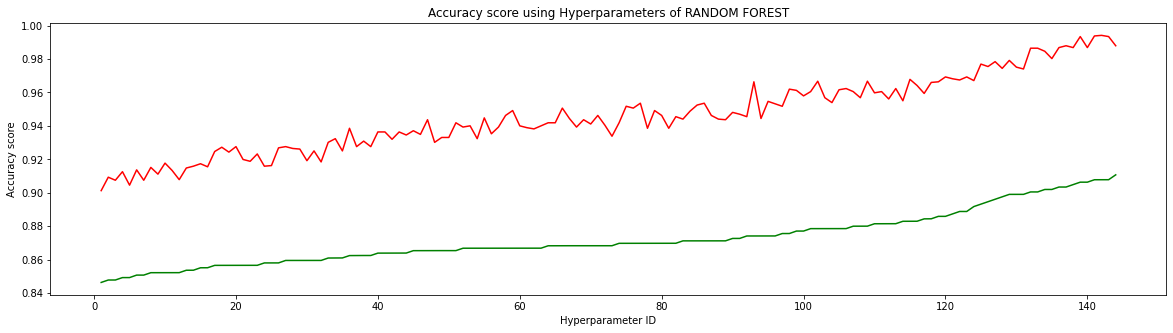

In [ ]:
best_acc_params_rf=HyperParamsResultsPlot(BestParams_GridSearchCV(rf,X_train,y_train,hyper_params_rf,folds),"RANDOM FOREST")

##### **XGBoost :**

In [ ]:
xg=XGBClassifier(random_state=random_state)
hyper_params_xg={
    'max_depth': [3,8,10],
    'min_child_weight':[1,3,5],
    'min_samples_split': [5,10],
    'n_estimators': [200,300], 
    'max_features': [10,15,20],
     'class_weight':['balanced']
}

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  6.2min finished


---------------------------------------------------------------------------------------------------------
XGBoost
---------------------------------------------------------------------------------------------------------
Best hyparameters using accuracy as performance measure : 
 {'class_weight': 'balanced', 'max_depth': 8, 'max_features': 20, 'min_child_weight': 1, 'min_samples_split': 10, 'n_estimators': 300}


<Figure size 576x360 with 0 Axes>

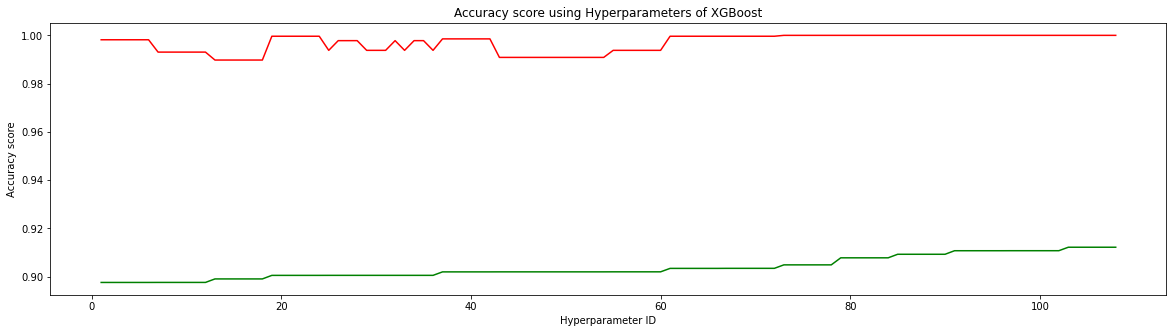

In [ ]:
best_acc_params_xg=HyperParamsResultsPlot(BestParams_GridSearchCV(xg,X_train,y_train,hyper_params_xg,folds),"XGBoost")

##### **GBDT :**

In [ ]:
gbdt=GradientBoostingClassifier(random_state=random_state)
hyper_params_gbdt={
    'max_depth': [3,8,10],
    'min_samples_leaf':[1,3,5],
    'min_samples_split': [5,10],
    'n_estimators': [200,300], 
    'max_features': [10,15,20]
    }

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 19.3min finished


---------------------------------------------------------------------------------------------------------
GBDT
---------------------------------------------------------------------------------------------------------
Best hyparameters using accuracy as performance measure : 
 {'max_depth': 3, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}


<Figure size 576x360 with 0 Axes>

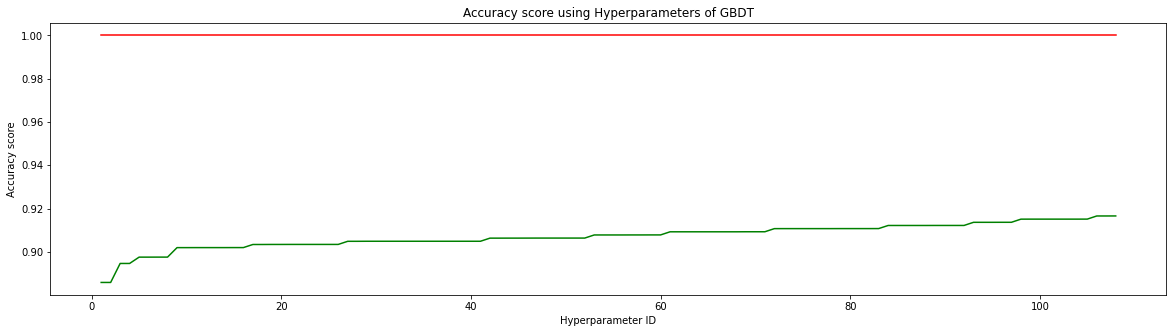

In [ ]:
best_acc_params_gbdt=HyperParamsResultsPlot(BestParams_GridSearchCV(gbdt,X_train,y_train,hyper_params_gbdt,folds),"GBDT")

##### **SVM :**

In [ ]:
svm=SVC(kernel='rbf',random_state=random_state)
hyper_params_svm={
    'C':[0.01,0.1,0.5,1,10,100,1000],
    'gamma':['auto','scale'],
    'class_weight':['balanced']
}

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


---------------------------------------------------------------------------------------------------------
SVM
---------------------------------------------------------------------------------------------------------
Best hyparameters using accuracy as performance measure : 
 {'C': 1000, 'class_weight': 'balanced', 'gamma': 'scale'}


[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.0s finished


<Figure size 576x360 with 0 Axes>

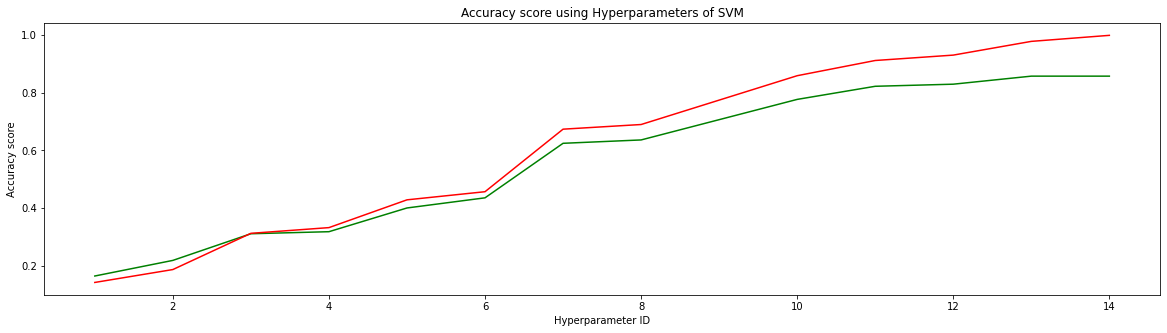

In [ ]:
best_acc_params_svm=HyperParamsResultsPlot(BestParams_GridSearchCV(svm,X_train,y_train,hyper_params_svm,folds),"SVM")

##### **MULTILAYER PERCEPTRON :**

In [ ]:
mlp=MLPClassifier()
hyper_params_mlp={
    'hidden_layer_sizes':[(100,),(200,),(300,)],
    'activation':['tanh','logistic','relu'],
    'alpha':[0.0001,0.001,0.01]
}

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.8min finished


---------------------------------------------------------------------------------------------------------
Multilayer Perceptron
---------------------------------------------------------------------------------------------------------
Best hyparameters using accuracy as performance measure : 
 {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (300,)}


<Figure size 576x360 with 0 Axes>

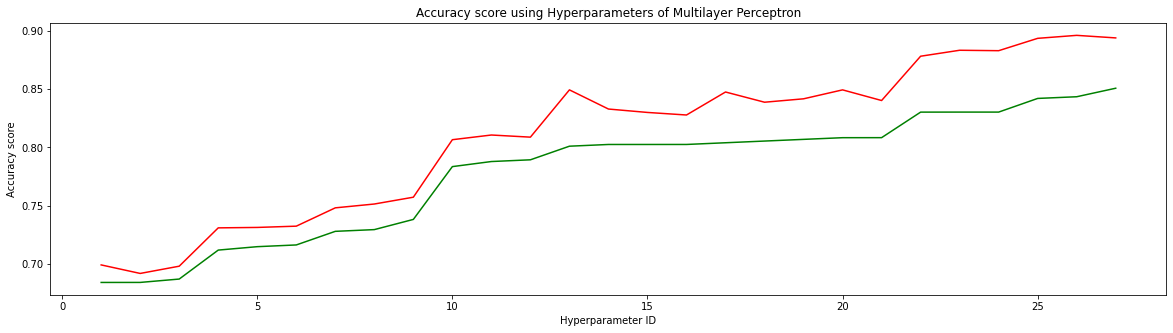

In [ ]:
best_acc_params_mlp=HyperParamsResultsPlot(BestParams_GridSearchCV(mlp,X_train,y_train,hyper_params_mlp,folds),"Multilayer Perceptron")

#### **Best Models :**

##### **Best Random Forest Model :**

In [ ]:
# best rf model 
best_rf=RandomForestClassifier(random_state=random_state,max_depth=12,max_features=15,min_samples_leaf=1,min_samples_split=5,n_estimators=200)
rf_test_pred=main_results(best_rf,X_train,X_val,X_test,y_train,y_val)
submission(rf_test_pred)


Validation Accuracy :  0.9319727891156463

 Test Predicted Category counts : 



1.0     231
0.0     104
2.0      46
6.0      26
5.0      17
14.0      2
Name: Category, dtype: int64

##### **Best XGBoost Model :**

In [ ]:
# best xgboost model 
best_xg=XGBClassifier(class_weight='balanced',max_depth=8,max_features=10,min_child_weight=1,min_samples_split=5,n_estimators=300,random_state=random_state)
xg_test_pred=main_results(best_xg,X_train,X_val,X_test,y_train,y_val)
submission(xg_test_pred)


Validation Accuracy :  0.9319727891156463

 Test Predicted Category counts : 



1.0     226
0.0     106
2.0      47
6.0      27
5.0      16
14.0      2
15.0      1
8.0       1
Name: Category, dtype: int64

##### **Best GBDT Model :**

In [ ]:
# best gbdt model 
best_gbdt=GradientBoostingClassifier(max_depth=10,max_features=15,min_samples_leaf=1,min_samples_split=10,n_estimators=200,random_state=random_state)
gbdt_test_pred=main_results(best_gbdt,X_train,X_val,X_test,y_train,y_val)
submission(gbdt_test_pred)


Validation Accuracy :  0.9251700680272109

 Test Predicted Category counts : 



1.0     226
0.0     104
2.0      43
6.0      27
5.0      17
8.0       4
14.0      3
15.0      1
7.0       1
Name: Category, dtype: int64

##### **Best SVM Model :**

In [ ]:
# best svm model 
best_svm=SVC(C=1000,class_weight='balanced',gamma='scale',probability=True,random_state=random_state)
svm_test_pred=main_results(best_svm,X_train,X_val,X_test,y_train,y_val)
submission(svm_test_pred)


Validation Accuracy :  0.8877551020408163

 Test Predicted Category counts : 



1.0     232
0.0      99
2.0      37
6.0      29
5.0      17
15.0      5
8.0       4
14.0      3
Name: Category, dtype: int64

##### **Best MLP Model :**

In [ ]:
# best mlp model 
best_mlp=MLPClassifier(activation='relu',alpha=0.01,hidden_layer_sizes=(300,),random_state=random_state)
mlp_test_pred=main_results(best_mlp,X_train,X_val,X_test,y_train,y_val)
submission(mlp_test_pred)


Validation Accuracy :  0.8775510204081632

 Test Predicted Category counts : 



1.0     236
0.0     103
2.0      47
6.0      29
5.0      10
14.0      1
Name: Category, dtype: int64

##### **Voting Classifier (Type - HARD) :**

In [ ]:
# hard voting classifier 
vcl_hard=VotingClassifier(estimators=[('rf',best_rf),('xgb',best_xg),('gbdt',best_gbdt)],voting='hard')
vcl_hard_test_pred=main_results(vcl_hard,X_train,X_val,X_test,y_train,y_val)
submission(vcl_hard_test_pred)


Validation Accuracy :  0.935374149659864

 Test Predicted Category counts : 



1.0     227
0.0     105
2.0      46
6.0      27
5.0      17
14.0      2
15.0      1
8.0       1
Name: Category, dtype: int64

##### **Voting Classifier (Type - SOFT) :**

In [ ]:
# soft voting classifier 
vcl_soft=VotingClassifier(estimators=[('rf',best_rf),('xgb',best_xg),('gbdt',best_gbdt)],voting='soft',weights=[0.35,0.35,0.3])
vcl_soft_test_pred=main_results(vcl_soft,X_train,X_val,X_test,y_train,y_val)
submission(vcl_soft_test_pred)


Validation Accuracy :  0.935374149659864

 Test Predicted Category counts : 



1.0     227
0.0     105
2.0      46
6.0      27
5.0      16
14.0      3
15.0      1
8.0       1
Name: Category, dtype: int64

## **RESULTS :**

### **Final Model :**

In [ ]:
# soft voting classifier 
final_clf=VotingClassifier(estimators=[('rf',best_rf),('xgb',best_xg),('gbdt',best_gbdt)],voting='soft',weights=[0.35,0.35,0.3])
test_pred=main_results(final_clf,X_train,X_val,X_test,y_train,y_val)


Validation Accuracy :  0.935374149659864


### **Submission File Generation :**

In [ ]:
# downloading the main submission file for kaggle
submission(test_pred,1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 Test Predicted Category counts : 



1.0     227
0.0     105
2.0      46
6.0      27
5.0      16
14.0      3
15.0      1
8.0       1
Name: Category, dtype: int64

In [ ]:
# main kaggle submission file 
'''

'''
final_submission = submission(test_pred,0,1)
final_submission

Id  Category
0    1    6.0     
1    2    2.0     
2    3    1.0     
3    4    1.0     
4    5    1.0     
5    6    2.0     
6    7    1.0     
7    8    5.0     
8    9    5.0     
9    10   0.0     
10   11   1.0     
11   12   6.0     
12   13   0.0     
13   14   1.0     
14   15   2.0     
15   16   0.0     
16   17   1.0     
17   18   1.0     
18   19   1.0     
19   20   1.0     
20   21   5.0     
21   22   5.0     
22   23   1.0     
23   24   1.0     
24   25   0.0     
25   26   2.0     
26   27   6.0     
27   28   0.0     
28   29   1.0     
29   30   0.0     
30   31   0.0     
31   32   1.0     
32   33   1.0     
33   34   6.0     
34   35   1.0     
35   36   0.0     
36   37   6.0     
37   38   0.0     
38   39   0.0     
39   40   1.0     
40   41   14.0    
41   42   1.0     
42   43   1.0     
43   44   1.0     
44   45   0.0     
45   46   1.0     
46   47   1.0     
47   48   0.0     
48   49   6.0     
49   50   1.0     
50   51   2.0     
51   52   1.0     
52   53   1.0     
53   54   1.0     
54   55   1.0     
55   56   1.0     
56   57   6.0     
57   58   2.0     
58   59   0.0     
59   60   0.0     
60   61   1.0     
61   62   1.0     
62   63   1.0     
63   64   6.0     
64   65   1.0     
65   66   1.0     
66   67   2.0     
67   68   2.0     
68   69   1.0     
69   70   2.0     
70   71   1.0     
71   72   2.0     
72   73   1.0     
73   74   1.0     
74   75   6.0     
75   76   1.0     
76   77   1.0     
77   78   1.0     
78   79   1.0     
79   80   1.0     
80   81   1.0     
81   82   1.0     
82   83   0.0     
83   84   1.0     
84   85   6.0     
85   86   0.0     
86   87   1.0     
87   88   1.0     
88   89   1.0     
89   90   1.0     
90   91   1.0     
91   92   0.0     
92   93   2.0     
93   94   1.0     
94   95   1.0     
95   96   1.0     
96   97   0.0     
97   98   1.0     
98   99   2.0     
99   100  0.0     
100  101  1.0     
101  102  0.0     
102  103  0.0     
103  104  1.0     
104  105  1.0     
105  106  1.0     
106  107  1.0     
107  108  0.0     
108  109  0.0     
109  110  2.0     
110  111  1.0     
111  112  0.0     
112  113  0.0     
113  114  0.0     
114  115  0.0     
115  116  6.0     
116  117  0.0     
117  118  1.0     
118  119  2.0     
119  120  1.0     
120  121  0.0     
121  122  1.0     
122  123  1.0     
123  124  1.0     
124  125  6.0     
125  126  1.0     
126  127  1.0     
127  128  1.0     
128  129  1.0     
129  130  1.0     
130  131  1.0     
131  132  1.0     
132  133  1.0     
133  134  0.0     
134  135  0.0     
135  136  2.0     
136  137  8.0     
137  138  2.0     
138  139  1.0     
139  140  0.0     
140  141  0.0     
141  142  1.0     
142  143  0.0     
143  144  2.0     
144  145  1.0     
145  146  1.0     
146  147  6.0     
147  148  1.0     
148  149  2.0     
149  150  0.0     
150  151  1.0     
151  152  1.0     
152  153  6.0     
153  154  1.0     
154  155  1.0     
155  156  1.0     
156  157  1.0     
157  158  0.0     
158  159  1.0     
159  160  1.0     
160  161  0.0     
161  162  1.0     
162  163  0.0     
163  164  0.0     
164  165  2.0     
165  166  1.0     
166  167  0.0     
167  168  0.0     
168  169  0.0     
169  170  1.0     
170  171  0.0     
171  172  0.0     
172  173  1.0     
173  174  1.0     
174  175  1.0     
175  176  1.0     
176  177  1.0     
177  178  1.0     
178  179  0.0     
179  180  0.0     
180  181  2.0     
181  182  5.0     
182  183  1.0     
183  184  1.0     
184  185  2.0     
185  186  1.0     
186  187  1.0     
187  188  2.0     
188  189  1.0     
189  190  1.0     
190  191  5.0     
191  192  0.0     
192  193  2.0     
193  194  6.0     
194  195  1.0     
195  196  1.0     
196  197  0.0     
197  198  1.0     
198  199  1.0     
199  200  1.0     
200  201  1.0     
201  202  0.0     
202  203  1.0     
203  204  6.0     
204  205  1.0     
205  206  1.0     
206  207  1.0     
207  208  0.0     
208  209  1.0     
209  210  14.0  

### **FoML Competition Test Dataset Accuracy :**

***KAGGLE ACCURACY SCORE : 0.94366***
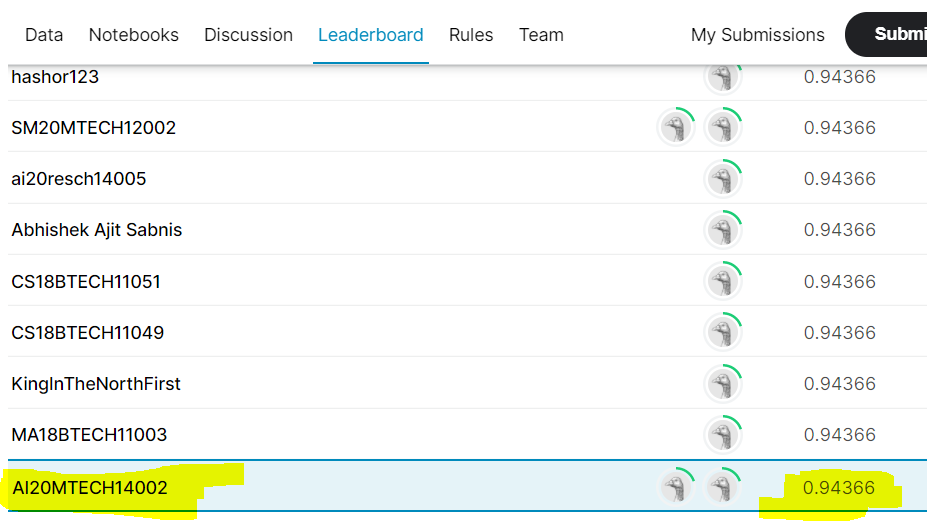

In [4]:
!jupyter nbconvert --to html /content/ASSIGNMENT_2_FML_FINAL_SUBMISSION_FILE.ipynb

[NbConvertApp] Converting notebook /content/ASSIGNMENT_2_FML_FINAL_SUBMISSION_FILE.ipynb to html
[NbConvertApp] Writing 4446072 bytes to /content/ASSIGNMENT_2_FML_FINAL_SUBMISSION_FILE.html
